In [116]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
plt.rcParams.update({'font.size': 14})

from copy import deepcopy
import argparse
import os
import linsolve

from hera_cal import utils
from hera_cal import version
from hera_cal.noise import predict_noise_variance_from_autos
from hera_cal.datacontainer import DataContainer
from hera_cal.utils import split_pol, conj_pol, split_bl, reverse_bl, join_bl, join_pol, comply_pol
from hera_cal.io import HERAData, HERACal, write_cal, save_redcal_meta
from hera_cal.apply_cal import calibrate_in_place

## Importing functions
from hera_cal.redcal import _get_pol_load_list, filter_reds, redundantly_calibrate, expand_omni_sol,get_pos_reds ,add_pol_reds
import All_functions as logical ## Logi_Cal functions
import modified_redcal

### Fixing degenaracies


import hera_pspec as hp
import hera_cal as hc
from hera_sim import io

## Classification
from sklearn.cluster import KMeans

# import uvtools
# import hera_cal as hc
# import hera_pspec as hp
# from pyuvdata import UVCal, UVData
# import pyuvdata.utils as uvutils




SEC_PER_DAY = 86400.
IDEALIZED_BL_TOL = 1e-8  # bl_error_tol for redcal.get_reds when using antenna positions calculated from reds


In [3]:
# filename = "../non-redundant-pipeline/calibration_3a_0.01_10_10/viscatBC_stretch0.01_g_cal.uvh5"  ## Calibrated Data
# filename1 = "../non-redundant-pipeline/calibration_3a_0.01_10_10/viscatBC_stretch0.01_g.uvh5"     ## Uncalibrated data
# filename2 = "../non-redundant-pipeline/calibration_3a_0.01_10_10/viscatBC_stretch0.01.uvh5"       ## True data
# gain_filename = "../non-redundant-pipeline/calibration_3a_0.01_10_10/viscatBC_stretch0.01.calfits"## Gain file


##########################################################################################################################
##########################################################################################################################


# calib_param = "10_10_60"  ## Array_nfreq_ntimes

non_red_cases_list = ["case3a", "case_4a_0.01","case_4a_0.02", "case_4b_0.01","case_4b_0.02", "case_1_0.05", "case_5"]
non_red_case = non_red_cases_list[1]

calib_param = "124_120_10_seed100"  ## Array_nfreq_ntimes

## ========================================================= Case_0 =================================================================
# filename = "../non-redundant-pipeline/test_simulations/case_0/calibration_" +calib_param+ "/viscatBC_g_cal.uvh5"  ## Calibrated Data
# filename1 = "../non-redundant-pipeline/test_simulations/case_0/calibration_" +calib_param+ "/viscatBC_g.uvh5"     ## Uncalibrated data
# filename2 = "../non-redundant-pipeline/test_simulations/case_0/calibration_" +calib_param+ "/viscatBC.uvh5"       ## True data
# gain_filename = "../non-redundant-pipeline/test_simulations/case_0/calibration_" +calib_param+ "/viscatBC.calfits"## Gain file


# ## ========================================================= Case 3a =================================================================
# filename = "../non-redundant-pipeline/test_simulations/case_3a/calibration_" +calib_param+ "/viscatBC_stretch0.01_g_cal.uvh5"  ## Calibrated Data
# filename1 = "../non-redundant-pipeline/test_simulations/case_3a/calibration_" +calib_param+ "/viscatBC_stretch0.01_g.uvh5"     ## Uncalibrated data
# filename2 = "../non-redundant-pipeline/test_simulations/case_3a/calibration_" +calib_param+ "/viscatBC_stretch0.01.uvh5"       ## True data
# gain_filename = "../non-redundant-pipeline/test_simulations/case_3a/calibration_" +calib_param+ "/viscatBC_stretch0.01.calfits"## Gain file

# ## ========================================================= Case 4a_0.01 =========================================================
filename = "../non-redundant-pipeline/test_simulations/case_4a_0.01/calibration_" +calib_param+ "/viscatBC_4a_0.01_g_cal.uvh5"  ## Calibrated Data
filename1 = "../non-redundant-pipeline/test_simulations/case_4a_0.01/calibration_" +calib_param+ "/viscatBC_4a_0.01_g.uvh5"     ## Uncalibrated data
filename2 = "../non-redundant-pipeline/test_simulations/case_4a_0.01/calibration_" +calib_param+ "/viscatBC_4a_0.01.uvh5"       ## True data
gain_filename = "../non-redundant-pipeline/test_simulations/case_4a_0.01/calibration_" +calib_param+ "/viscatBC_4a_0.01.calfits"## Gain file


# # ## ========================================================= Case 4a_0.02 =========================================================
# filename = "../non-redundant-pipeline/test_simulations/case_4a_0.02/calibration_" +calib_param+ "/viscatBC_4a_0.02_g_cal.uvh5"  ## Calibrated Data
# filename1 = "../non-redundant-pipeline/test_simulations/case_4a_0.02/calibration_" +calib_param+ "/viscatBC_4a_0.02_g.uvh5"     ## Uncalibrated data
# filename2 = "../non-redundant-pipeline/test_simulations/case_4a_0.02/calibration_" +calib_param+ "/viscatBC_4a_0.02.uvh5"       ## True data
# gain_filename = "../non-redundant-pipeline/test_simulations/case_4a_0.02/calibration_" +calib_param+ "/viscatBC_4a_0.02.calfits"## Gain file



# ## ========================================================= Case 4b_0.01 =========================================================
# filename = "../non-redundant-pipeline/test_simulations/case_4b_0.01/calibration_" +calib_param+ "/viscatBC_4b_0.01_g_cal.uvh5"  ## Calibrated Data
# filename1 = "../non-redundant-pipeline/test_simulations/case_4b_0.01/calibration_" +calib_param+ "/viscatBC_4b_0.01_g.uvh5"     ## Uncalibrated data
# filename2 = "../non-redundant-pipeline/test_simulations/case_4b_0.01/calibration_" +calib_param+ "/viscatBC_4b_0.01.uvh5"       ## True data
# gain_filename = "../non-redundant-pipeline/test_simulations/case_4b_0.01/calibration_" +calib_param+ "/viscatBC_4b_0.01.calfits"## Gain file


# # ## ========================================================= Case 4b_0.02 =========================================================
# filename = "../non-redundant-pipeline/test_simulations/case_4b_0.02/calibration_" +calib_param+ "/viscatBC_4b_0.02_g_cal.uvh5"  ## Calibrated Data
# filename1 = "../non-redundant-pipeline/test_simulations/case_4b_0.02/calibration_" +calib_param+ "/viscatBC_4b_0.02_g.uvh5"     ## Uncalibrated data
# filename2 = "../non-redundant-pipeline/test_simulations/case_4b_0.02/calibration_" +calib_param+ "/viscatBC_4b_0.02.uvh5"       ## True data
# gain_filename = "../non-redundant-pipeline/test_simulations/case_4b_0.02/calibration_" +calib_param+ "/viscatBC_4b_0.02.calfits"## Gain file


## ========================================================= Case 1_0.05 =========================================================
# filename = "../non-redundant-pipeline/test_simulations/case_1_0.05/calibration_" +calib_param+ "/viscatBC_side0.05_g_cal.uvh5"  ## Calibrated Data
# filename1 = "../non-redundant-pipeline/test_simulations/case_1_0.05/calibration_" +calib_param+ "/viscatBC_side0.05_g.uvh5"     ## Uncalibrated data
# filename2 = "../non-redundant-pipeline/test_simulations/case_1_0.05/calibration_" +calib_param+ "/viscatBC_side0.05.uvh5"       ## True data
# gain_filename = "../non-redundant-pipeline/test_simulations/case_1_0.05/calibration_" +calib_param+ "/viscatBC_side0.05.calfits" ## Gain file


# ## ========================================================= Case 5 =========================================================
# filename = "../non-redundant-pipeline/test_simulations/case_5/calibration_" +calib_param+ "/viscatBC_5_g_cal.uvh5"  ## Calibrated Data
# filename1 = "../non-redundant-pipeline/test_simulations/case_5//calibration_" +calib_param+ "/viscatBC_5_g.uvh5"     ## Uncalibrated data
# filename2 = "../non-redundant-pipeline/test_simulations/case_5/calibration_" +calib_param+ "/viscatBC_5.uvh5"       ## True data
# gain_filename = "../non-redundant-pipeline/test_simulations/case_5/calibration_" +calib_param+ "/viscatBC_5.calfits" ## Gain file


#############################################################################################################################################

# filename = "../non-redundant-pipeline/calibration_3a_0.01_10_10/viscatBC_stretch0.01_g_cal.uvh5"
# filename1 = "../non-redundant-pipeline/calibration_3a_0.01_10_10/viscatBC_stretch0.01_g.uvh5"
# filename2 = "../non-redundant-pipeline/calibration_3a_0.01_10_10/viscatBC_stretch0.01.uvh5"
# gain_filename = "../non-redundant-pipeline/calibration_3a_0.01_10_10/viscatBC_stretch0.01.calfits"## Gain file


# filename = "../non-redundant-pipeline/calibration/viscatBC_stretch0.01_g_cal.uvh5"
# filename1 = "../non-redundant-pipeline/calibration/viscatBC_stretch0.01_g.uvh5"
# filename2 = "../non-redundant-pipeline/calibration/viscatBC_stretch0.01.uvh5"
# gain_filename = "../non-redundant-pipeline/calibration/viscatBC_stretch0.01.calfits"  ## Gain file




c_data = HERAData(filename)   ## calibrated data
c_data.read()

hd = HERAData(filename1)   ## Uncalibrated data (data has noise and gains)
hd.read()

true_data = HERAData(filename2)  ## True data (No noise and gains)
true_data.read()


import utils

true_gains, _= hc.io.load_cal(gain_filename)  ## Calling dictionary of true gains

from hera_cal import utils

c_data

Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.


In [4]:
len(hd.times)

import sys
sys.path.insert(0, '../logi_cal')

import All_functions as logical

In [10]:
all_reds = logical.get_reds(hd.antpos)

len(all_reds[30])

61

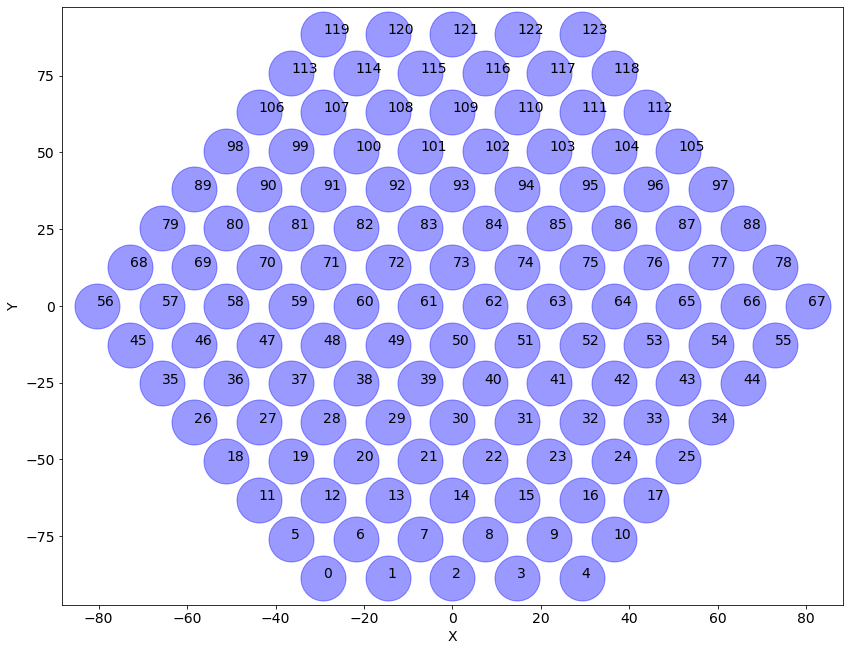

In [11]:
plt.figure(figsize=(14,11))

for i in range(len(hd.antpos)):
    plt.plot(hd.antpos[i][0], hd.antpos[i][1],'bo', alpha=0.4, label='0', markersize=45)
    plt.annotate("{}".format(i), (hd.antpos[i][0],hd.antpos[i][1] ))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [62]:
# non_red_cases_list = ["case3a", "case_4a_0.01", "case_4b_0.01", "case_5"]

# case_index = 0
non_red_case = non_red_cases_list[case_index]

calib_param = "10_10_10"  ## Array_nfreq_ntimes

Filename_list = np.array([["../non-redundant-pipeline/test_simulations/case_3a/calibration_" +calib_param+ "/viscatBC_stretch0.01_g_cal.uvh5",
                 "../non-redundant-pipeline/test_simulations/case_3a/calibration_" +calib_param+ "/viscatBC_stretch0.01_g.uvh5",
                 "../non-redundant-pipeline/test_simulations/case_3a/calibration_" +calib_param+ "/viscatBC_stretch0.01.uvh5",
                 "../non-redundant-pipeline/test_simulations/case_3a/calibration_" +calib_param+ "/viscatBC_stretch0.01.calfits"],
                  ["../non-redundant-pipeline/test_simulations/case_4a_0.01/calibration_" +calib_param+ "/viscatBC_4a_0.01_g_cal.uvh5",
                  "../non-redundant-pipeline/test_simulations/case_4a_0.01/calibration_" +calib_param+ "/viscatBC_4a_0.01_g.uvh5",
                  "../non-redundant-pipeline/test_simulations/case_4a_0.01/calibration_" +calib_param+ "/viscatBC_4a_0.01.uvh5",
                  "../non-redundant-pipeline/test_simulations/case_4a_0.01/calibration_" +calib_param+ "/viscatBC_4a_0.01.calfits"],
                  ["../non-redundant-pipeline/test_simulations/case_4a_0.02/calibration_" +calib_param+ "/viscatBC_4a_0.02_g_cal.uvh5",
                  "../non-redundant-pipeline/test_simulations/case_4a_0.02/calibration_" +calib_param+ "/viscatBC_4a_0.02_g.uvh5",
                  "../non-redundant-pipeline/test_simulations/case_4a_0.02/calibration_" +calib_param+ "/viscatBC_4a_0.02.uvh5",
                  "../non-redundant-pipeline/test_simulations/case_4a_0.02/calibration_" +calib_param+ "/viscatBC_4a_0.02.calfits"],
                 ["../non-redundant-pipeline/test_simulations/case_4b_0.01/calibration_" +calib_param+ "/viscatBC_4b_0.01_g_cal.uvh5",
                  "../non-redundant-pipeline/test_simulations/case_4b_0.01/calibration_" +calib_param+ "/viscatBC_4b_0.01_g.uvh5",
                  "../non-redundant-pipeline/test_simulations/case_4b_0.01/calibration_" +calib_param+ "/viscatBC_4b_0.01.uvh5",
                  "../non-redundant-pipeline/test_simulations/case_4b_0.01/calibration_" +calib_param+ "/viscatBC_4b_0.01.calfits"],
                ["../non-redundant-pipeline/test_simulations/case_4b_0.02/calibration_" +calib_param+ "/viscatBC_4b_0.02_g_cal.uvh5",
                  "../non-redundant-pipeline/test_simulations/case_4b_0.02/calibration_" +calib_param+ "/viscatBC_4b_0.02_g.uvh5",
                  "../non-redundant-pipeline/test_simulations/case_4b_0.02/calibration_" +calib_param+ "/viscatBC_4b_0.02.uvh5",
                  "../non-redundant-pipeline/test_simulations/case_4b_0.02/calibration_" +calib_param+ "/viscatBC_4b_0.02.calfits"],
                ["../non-redundant-pipeline/test_simulations/case_1_0.05/calibration_" +calib_param+ "/viscatBC_side0.05_g_cal.uvh5",
                 "../non-redundant-pipeline/test_simulations/case_1_0.05/calibration_" +calib_param+ "/viscatBC_side0.05_g.uvh5",
                 "../non-redundant-pipeline/test_simulations/case_1_0.05/calibration_" +calib_param+ "/viscatBC_side0.05.uvh5" ,
                 "../non-redundant-pipeline/test_simulations/case_1_0.05/calibration_" +calib_param+ "/viscatBC_side0.05.calfits"],
                 ["../non-redundant-pipeline/test_simulations/case_5/calibration_" +calib_param+ "/viscatBC_5_g_cal.uvh5",
                 "../non-redundant-pipeline/test_simulations/case_5/calibration_" +calib_param+ "/viscatBC_5_g.uvh5",
                 "../non-redundant-pipeline/test_simulations/case_5/calibration_" +calib_param+ "/viscatBC_5.uvh5" ,
                 "../non-redundant-pipeline/test_simulations/case_5/calibration_" +calib_param+ "/viscatBC_5.calfits"]])

In [348]:
Filename_list


array([['../non-redundant-pipeline/test_simulations/case_3a/calibration_10_10_10/viscatBC_stretch0.01_g_cal.uvh5',
        '../non-redundant-pipeline/test_simulations/case_3a/calibration_10_10_10/viscatBC_stretch0.01_g.uvh5',
        '../non-redundant-pipeline/test_simulations/case_3a/calibration_10_10_10/viscatBC_stretch0.01.uvh5',
        '../non-redundant-pipeline/test_simulations/case_3a/calibration_10_10_10/viscatBC_stretch0.01.calfits'],
       ['../non-redundant-pipeline/test_simulations/case_4a_0.01/calibration_10_10_10/viscatBC_4a_0.01_g_cal.uvh5',
        '../non-redundant-pipeline/test_simulations/case_4a_0.01/calibration_10_10_10/viscatBC_4a_0.01_g.uvh5',
        '../non-redundant-pipeline/test_simulations/case_4a_0.01/calibration_10_10_10/viscatBC_4a_0.01.uvh5',
        '../non-redundant-pipeline/test_simulations/case_4a_0.01/calibration_10_10_10/viscatBC_4a_0.01.calfits'],
       ['../non-redundant-pipeline/test_simulations/case_4a_0.02/calibration_10_10_10/viscatBC_4a_0.

In [309]:
Filename_list

logical_gains_fixed, redcal_gains_fixed = [],[]
g_list_logical ,g_list_redcal = [], []
delta_sq_list_logical , delta_sq_list_redcal= [],[]

for case_index in range(len(Filename_list)):
    c_data = HERAData(Filename_list[case_index][0])   ## calibrated data
    c_data.read()

    hd = HERAData(Filename_list[case_index][1])   ## Uncalibrated data (data has noise and gains)
    hd.read()

    true_data = HERAData(Filename_list[case_index][2])  ## True data (No noise and gains)
    true_data.read()


    import utils

    true_gains, _= hc.io.load_cal(Filename_list[case_index][3])  ## Calling dictionary of true gains

    from hera_cal import utils
    #####################################################################################################################
    # Running RedCal
    red_gains = redcal_iteration(hd,min_bl_cut=10,max_bl_cut=80)
    ## Fixing degeneracies
    red_gains_fixed = logical.fix_redcal_degeneracies(filename1, red_gains['g_omnical'],true_gains)
    
    redcal_gains_fixed.append(red_gains_fixed)
    #####################################################################################################################
    #### Using a k-means clustering
    N_red_clusters = 4
    k_value = 3
    #Running Logi_Cal 
    customized_groups = logical.custom_reds2(hd,c_data,k_value,N_red_clusters)
    custom_red_gains = logical.redcal_iteration_custom2(hd,customized_groups,min_bl_cut=10,max_bl_cut=80)
    ## Fixing degeneracies
    custom_red_gains_fixed = logical.fix_redcal_degeneracies(filename1, custom_red_gains['g_omnical'], true_gains)

    logical_gains_fixed.append(custom_red_gains_fixed)
    
    #######################################################################################################################
    X_custom_true_sum  = logical.calulate_X2_sum(true_gains,red_gains_fixed, custom_red_gains_fixed)[1]
    X_red_true_sum  = logical.calulate_X2_sum(true_gains,red_gains_fixed, custom_red_gains_fixed )[0]
    
    delta_sq_list_logical.append(X_custom_true_sum)
    delta_sq_list_redcal.append(X_red_true_sum)
    
    #######################################################################################################################
    antenna = 7
    custom_antenna_gain = custom_red_gains_fixed[(antenna,'Jee')]
    redcal_antenna_gain = red_gains_fixed[(antenna,'Jee')]


    RGF_logical =  custom_antenna_gain/true_gains[(antenna,'Jee')] - 1
    RGF_redcal =  redcal_antenna_gain/true_gains[(antenna,'Jee')] - 1
    #####################################################################################################################

    g_list_logical.append(RGF_logical)
    g_list_redcal.append(RGF_redcal)
    
    print(non_red_cases_list[case_index]+ 'Complete')
    
    

Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.


redcal_iteration_custom2 Complete


Telescope hera_sim is not in known_telescopes.


case3aComplete


Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.


redcal_iteration_custom2 Complete


Telescope hera_sim is not in known_telescopes.


case_4a_0.01Complete


Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.


redcal_iteration_custom2 Complete


Telescope hera_sim is not in known_telescopes.


case_4a_0.02Complete


Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.


redcal_iteration_custom2 Complete


Telescope hera_sim is not in known_telescopes.


case_4b_0.01Complete


Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.


redcal_iteration_custom2 Complete


Telescope hera_sim is not in known_telescopes.


case_4b_0.02Complete


Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.


redcal_iteration_custom2 Complete


Telescope hera_sim is not in known_telescopes.


case_1_0.2Complete


Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.


redcal_iteration_custom2 Complete


Telescope hera_sim is not in known_telescopes.


case_5Complete


In [310]:
# logical_gains_fixed_75, redcal_gains_fixed_75 = logical_gains_fixed, redcal_gains_fixed
# g_list_logical_75 ,g_list_redcal_75 = g_list_logical, g_list_redcal
# delta_sq_list_logical_75 , delta_sq_list_redcal_75= delta_sq_list_logical, delta_sq_list_redcal


# logical_gains_fixed_10, redcal_gains_fixed_10 = logical_gains_fixed, redcal_gains_fixed
# g_list_logical_10 ,g_list_redcal_10 = g_list_logical, g_list_redcal
# delta_sq_list_logical_10 , delta_sq_list_redcal_10= delta_sq_list_logical, delta_sq_list_redcal

In [9]:
np.arange(3,6+1)

array([3, 4, 5, 6])

In [14]:
from hera_cal.redcal import redcal_iteration

# Running RedCal
red_gains = redcal_iteration(hd,min_bl_cut=10,max_bl_cut=80)

## Fixing degeneracies

red_gains_fixed = logical.fix_redcal_degeneracies(filename1, red_gains['g_omnical'],true_gains)

Telescope hera_sim is not in known_telescopes.


In [178]:
def custom_reds_option2(hd, data_file, Number_of_clusters, red_groups_index, nInt_to_load=None, pol_mode='2pol', bl_error_tol=1.0, ex_ants=[],
                     solar_horizon=0.0, flag_nchan_low=0, flag_nchan_high=0, fc_conv_crit=1e-6,
                     fc_maxiter=50, oc_conv_crit=1e-10, oc_maxiter=500, check_every=10, check_after=50,
                     gain=.4, max_dims=2, verbose=False, **filter_reds_kwargs):
    
        
    """ Combines the clustered baselines groups with the original get_reds groups and also changes their polarisation
        of the groups from 'nn' to 'ee'.

    Returns:
        reds: list of lists of redundant baseline tuples, e.g. (ind1,ind2,pol).
            Each list has a list of baselines that are clustered into the same group by the 
            clustering algorithm.
    """
    if nInt_to_load is not None:
        assert hd.filetype == 'uvh5', 'Partial loading only available for uvh5 filetype.'
    else:
        if hd.data_array is None:  # if data loading hasn't happened yet, load the whole file
            hd.read()
        if hd.times is None:  # load metadata into HERAData object if necessary
            for key, value in hd.get_metadata_dict().items():
                setattr(hd, key, value)

    # get basic antenna, polarization, and observation info
    nTimes, nFreqs = len(hd.times), len(hd.freqs)
    fSlice = slice(flag_nchan_low, nFreqs - flag_nchan_high)
    antpols = list(set([ap for pol in hd.pols for ap in split_pol(pol)]))
    ant_nums = np.unique(np.append(hd.ant_1_array, hd.ant_2_array))
    ants = [(ant, antpol) for ant in ant_nums for antpol in antpols]
    pol_load_list = _get_pol_load_list(hd.pols, pol_mode=pol_mode)

    # initialize gains to 1s, gain flags to True, and chisq to 0s
    rv = {}  # dictionary of return values
    rv['g_firstcal'] = {ant: np.ones((nTimes, nFreqs), dtype=np.complex64) for ant in ants}
    rv['gf_firstcal'] = {ant: np.ones((nTimes, nFreqs), dtype=bool) for ant in ants}
    rv['g_omnical'] = {ant: np.ones((nTimes, nFreqs), dtype=np.complex64) for ant in ants}
    rv['gf_omnical'] = {ant: np.ones((nTimes, nFreqs), dtype=bool) for ant in ants}
    rv['chisq'] = {antpol: np.zeros((nTimes, nFreqs), dtype=np.float32) for antpol in antpols}
    rv['chisq_per_ant'] = {ant: np.zeros((nTimes, nFreqs), dtype=np.float32) for ant in ants}

#    get reds and then intitialize omnical visibility solutions to all 1s and all flagged
    rd = get_reds({ant: hd.antpos[ant] for ant in ant_nums}, bl_error_tol=bl_error_tol,
                        pol_mode=pol_mode, pols=set([pol for pols in pol_load_list for pol in pols]))
    
    clustered_baseline_groups = []
    
    
#         for z in range(red_groups_index):
#         clustered_baseline_groups.append(get_custom_reds2(data_file,Number_of_clusters[0],z))
#         print(z)
    
    Number_of_clusters= np.arange(2,Number_of_clusters+1)
    for z in range(0,15):
        clustered_baseline_groups.append(get_custom_reds2(data_file,Number_of_clusters[-1],z))
        print(z)
    print("")
    for z in range(15,30):
        clustered_baseline_groups.append(get_custom_reds2(data_file,Number_of_clusters[-2],z))
        print(z)
    print("")
    for z in range(30,45):
        clustered_baseline_groups.append(get_custom_reds2(data_file,Number_of_clusters[-3],z))
        print(z)
    print("")
    for z in range(45,red_groups_index):
        clustered_baseline_groups.append(get_custom_reds2(data_file,Number_of_clusters[-3],z))
        print(z)

    ## Replaces the original redundand groups by its clustered subgroups.
    all_reds = []
    #appends groups that are clustered
    for k1 in range(len(clustered_baseline_groups)):
        for k2 in range(len(clustered_baseline_groups[k1])):
            all_reds.append(clustered_baseline_groups[k1][k2])
    
    # Appends the un-clustered groups
    for k3 in range(len(clustered_baseline_groups),len(rd)):
        all_reds.append(rd[k3])
    

    return all_reds

In [13]:
def custom_reds_option3(hd, data_file, Number_of_clusters, red_groups_index, nInt_to_load=None, pol_mode='2pol', bl_error_tol=1.0, ex_ants=[],
                     solar_horizon=0.0, flag_nchan_low=0, flag_nchan_high=0, fc_conv_crit=1e-6,
                     fc_maxiter=50, oc_conv_crit=1e-10, oc_maxiter=500, check_every=10, check_after=50,
                     gain=.4, max_dims=2, verbose=False, **filter_reds_kwargs):
    
        
    """ Combines the clustered baselines groups with the original get_reds groups and also changes their polarisation
        of the groups from 'nn' to 'ee'.

    Returns:
        reds: list of lists of redundant baseline tuples, e.g. (ind1,ind2,pol).
            Each list has a list of baselines that are clustered into the same group by the 
            clustering algorithm.
    """
    if nInt_to_load is not None:
        assert hd.filetype == 'uvh5', 'Partial loading only available for uvh5 filetype.'
    else:
        if hd.data_array is None:  # if data loading hasn't happened yet, load the whole file
            hd.read()
        if hd.times is None:  # load metadata into HERAData object if necessary
            for key, value in hd.get_metadata_dict().items():
                setattr(hd, key, value)

    # get basic antenna, polarization, and observation info
    nTimes, nFreqs = len(hd.times), len(hd.freqs)
    fSlice = slice(flag_nchan_low, nFreqs - flag_nchan_high)
    antpols = list(set([ap for pol in hd.pols for ap in split_pol(pol)]))
    ant_nums = np.unique(np.append(hd.ant_1_array, hd.ant_2_array))
    ants = [(ant, antpol) for ant in ant_nums for antpol in antpols]
    pol_load_list = _get_pol_load_list(hd.pols, pol_mode=pol_mode)

    # initialize gains to 1s, gain flags to True, and chisq to 0s
    rv = {}  # dictionary of return values
    rv['g_firstcal'] = {ant: np.ones((nTimes, nFreqs), dtype=np.complex64) for ant in ants}
    rv['gf_firstcal'] = {ant: np.ones((nTimes, nFreqs), dtype=bool) for ant in ants}
    rv['g_omnical'] = {ant: np.ones((nTimes, nFreqs), dtype=np.complex64) for ant in ants}
    rv['gf_omnical'] = {ant: np.ones((nTimes, nFreqs), dtype=bool) for ant in ants}
    rv['chisq'] = {antpol: np.zeros((nTimes, nFreqs), dtype=np.float32) for antpol in antpols}
    rv['chisq_per_ant'] = {ant: np.zeros((nTimes, nFreqs), dtype=np.float32) for ant in ants}

#    get reds and then intitialize omnical visibility solutions to all 1s and all flagged
    rd = get_reds({ant: hd.antpos[ant] for ant in ant_nums}, bl_error_tol=bl_error_tol,
                        pol_mode=pol_mode, pols=set([pol for pols in pol_load_list for pol in pols]))
    
    clustered_baseline_groups = []
    
    k_values = np.arange(2,Number_of_clusters+1)
    for z in range(red_groups_index):
        k_v = random.choice(k_values)
        clustered_baseline_groups.append(get_custom_reds2(data_file,k_v,z))
        print(k_v)


    ## Replaces the original redundand groups by its clustered subgroups.
    all_reds = []
    #appends groups that are clustered
    for k1 in range(len(clustered_baseline_groups)):
        for k2 in range(len(clustered_baseline_groups[k1])):
            all_reds.append(clustered_baseline_groups[k1][k2])
    
    # Appends the un-clustered groups
    for k3 in range(len(clustered_baseline_groups),len(rd)):
        all_reds.append(rd[k3])
    

    return all_reds

In [155]:
Number_of_clusters= np.arange(3,6+1)

Number_of_clusters[-4]

3

In [26]:
from All_functions import get_reds
from All_functions import get_custom_reds2


#### Using a k-means clustering

N_red_clusters = 60
k_value = 6
#Running Logi_Cal 
customized_groups = custom_reds_option3(hd,c_data,k_value,N_red_clusters)

6
5
3
3
6
3
2
3
6
6
3
5
6
4
6
4
5
4
6
6
2
5
6
3
6
6
3
5
2
5
4
6
6
3
6
5
5
4
5
4
2
6
6
6
6
4
5
6
2
3
3
6
6
3
2
6
4
2
2
2


In [176]:
# all_reds = get_reds(hd.antpos)
# print(all_reds[14])
len(customized_groups)

a=np.arange(2,7)
N_red_clusters = 60
k_value = 4
#Running Logi_Cal 
customized_groups = logical.random_custom_reds2(hd,c_data,k_value,N_red_clusters)


In [27]:
#### Using a k-means clustering

# N_red_clusters = 4
# k_value = 3
# #Running Logi_Cal 
# customized_groups = logical.custom_reds2(hd,c_data,k_value,N_red_clusters)
custom_red_gains = logical.redcal_iteration_custom2(hd,customized_groups,min_bl_cut=10,max_bl_cut=80)


## Fixing degeneracies
custom_red_gains_fixed = logical.fix_redcal_degeneracies(filename1, custom_red_gains['g_omnical'], true_gains)



redcal_iteration_custom2 Complete


Telescope hera_sim is not in known_telescopes.


In [15]:
# custom_red_gains_fixed = logical.fix_redcal_degeneracies(filename1, comp_redcal['g_omnical'], true_gains)

custom_red_gains_fixed = np.load('../new_plots_fixed_original_logical/case_3a/75/data_case3a_75_120_10_(15)_2__56_4.58.npy',allow_pickle=True)
custom_red_gains_fixed = custom_red_gains_fixed[()]


X_red_true_sum  = logical.calulate_X2_sum(true_gains,red_gains_fixed, custom_red_gains_fixed )[0]
X_custom_true_sum  = logical.calulate_X2_sum(true_gains,red_gains_fixed, custom_red_gains_fixed)[1]


np.shape(X_custom_true_sum[0])



()

Number of antennas with improved gains =  56


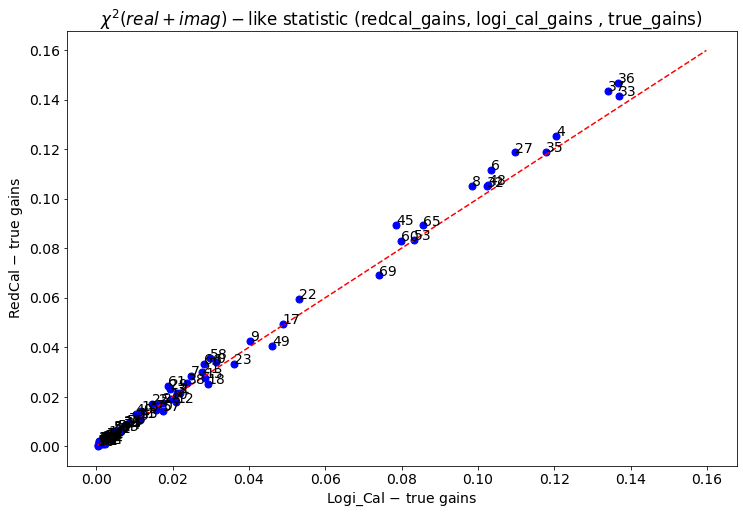

In [16]:
case_index = 2

# x_values = np.array(delta_sq_list_logical[case_index])  ## Logi_Cal
# y_values = np.array(delta_sq_list_redcal[case_index])   ## RedCal

x_values = np.array(X_custom_true_sum)  ## Logi_Cal
y_values = np.array(X_red_true_sum)   ## RedCal


fit_line = np.linspace(np.min(x_values), np.max(y_values)+(0.09*np.max(y_values)), len(x_values))

# fit_line = np.linspace(np.min(x_values), np.max(x_values), len(x_values))


len_true = x_values<y_values
true_count = sum(len_true)


print("Number of antennas with improved gains = ", true_count)
plt.figure(figsize=(12,8))
for i in range(len(y_values)):
    plt.plot(x_values[i], y_values[i], 'bo', markersize=7)
    plt.annotate('{}'.format(i), (x_values[i], y_values[i]) )


plt.plot(fit_line,fit_line, 'r--')
# plt.plot(np.unique(x_values), np.poly1d(np.polyfit(x_values, y_values, 1))(np.unique(x_values)))
plt.xlabel('Logi_Cal $-$ true gains')
plt.ylabel('RedCal $-$ true gains')
# plt.title('$\chi^2 (Real)-$like statistic (redcal_gains, logi_cal_gains , true_gains) ')
plt.title('$\chi^2 (real+imag)-$like statistic (redcal_gains, logi_cal_gains , true_gains) ')

# plt.savefig('../figures/__' +non_red_case+'_'+calib_param + '_({})_{}-1__({}).jpeg'.format(N_red_clusters,k_value , true_count))

# plt.savefig('../non-redundant-pipeline/test_simulations/plots/_' +non_red_case+'_'+calib_param + '_({})_3-2__({}).jpeg'.format(N_red_clusters, true_count))
# plt.savefig('../plots/Testing_logi-cal/random_clustering/_' +non_red_case+'_'+calib_param + '_({})_{}-3__({}).jpeg'.format(N_red_clusters,custom_groups[1] , true_count))

plt.show()




Number of antennas with improved gains =  56


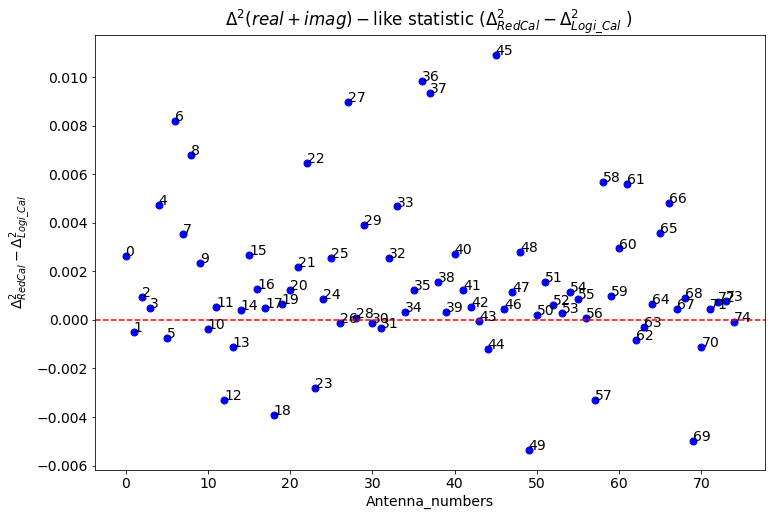

In [17]:


x_values = np.array(X_custom_true_sum)  ## Logi_Cal
y_values = np.array(X_red_true_sum)   ## RedCal


len_true = x_values<y_values
true_count = sum(len_true)
ant_list = np.arange(len(x_values))

print("Number of antennas with improved gains = ", true_count)

chi_diff = []
plt.figure(figsize=(12,8))
for i in range(len(y_values)):
    chi_diff_value = y_values[i]-x_values[i]
    plt.plot(ant_list[i], chi_diff_value, 'bo', markersize=7)
    plt.annotate('{}'.format(i), (ant_list[i], chi_diff_value) )
    
    chi_diff.append(chi_diff_value)
plt.axhline(linestyle='--', color='r')
plt.xlabel('Antenna_numbers')
plt.ylabel('$\Delta^2_{RedCal} - \Delta^2_{Logi\_Cal}$')
# plt.title('$\chi^2 (Real)-$like statistic (redcal_gains, logi_cal_gains , true_gains) ')
plt.title('$\Delta^2(real+imag)-$like statistic ($\Delta^2_{RedCal} - \Delta^2_{Logi\_Cal}$ ) ')
plt.show()


np.array([list(chi_diff).index(x) for x in chi_diff if x<0])


x_values = np.array(X_custom_true_sum)  ## Logi_Cal
y_values = np.array(X_red_true_sum)    ## RedCal

per_change = (np.mean(y_values) - np.mean(x_values) )/np.mean(y_values)*100
per_change = np.round(per_change,2)

In [184]:
(124**2-124)/2

7626.0

In [18]:
per_change

4.58

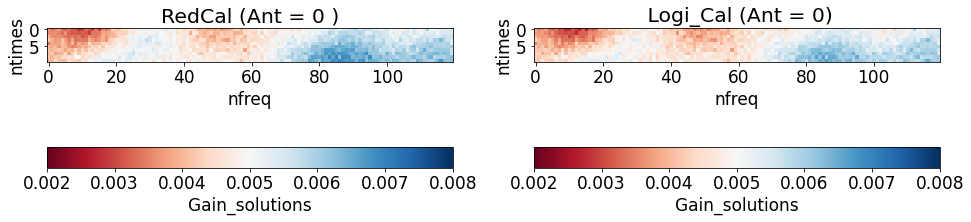

In [18]:
antenna = 0

custom_antenna_gain = custom_red_gains_fixed[(antenna,'Jee')]
redcal_antenna_gain = red_gains_fixed[(antenna,'Jee')]


RGF_logical =  custom_antenna_gain/true_gains[(antenna,'Jee')] - 1
RGF_redcal =  redcal_antenna_gain/true_gains[(antenna,'Jee')] - 1



v_lim_array = np.array([RGF_logical.max(), RGF_redcal.max(), 
                        RGF_logical.min(), RGF_redcal.min()])
tg_max = (np.real(v_lim_array.max()))
tg_min = (np.real(v_lim_array.min()))

tg_max = 0.002
tg_min = 0.008


fig = plt.figure(figsize=(16,10.5))
plt.rcParams.update({'font.size': 17})
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(np.real(RGF_redcal), cmap='RdBu', clim=(tg_min, tg_max))
ax.set_title('RedCal (Ant = {} )'.format(antenna))
plt.xlabel('nfreq')
plt.ylabel('ntimes')
plt.colorbar(orientation='horizontal', label='Gain_solutions')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(np.real(RGF_logical), cmap='RdBu', clim=(tg_min, tg_max) )
ax.set_title(' Logi_Cal (Ant = {})'.format(antenna))
plt.colorbar(orientation='horizontal', label='Gain_solutions')
plt.xlabel('nfreq')
plt.ylabel('ntimes')
plt.show()


In [344]:
case_index= 0

#######################################################################################################################
X_custom_true_sum  = logical.calulate_X2_sum(true_gains,red_gains_fixed, custom_red_gains_fixed)[1]
X_red_true_sum  = logical.calulate_X2_sum(true_gains,red_gains_fixed, custom_red_gains_fixed )[0]

delta_sq_list_logical.append(X_custom_true_sum)
delta_sq_list_redcal.append(X_red_true_sum)

#######################################################################################################################
antenna = 7
custom_antenna_gain = custom_red_gains_fixed[(antenna,'Jee')]
redcal_antenna_gain = red_gains_fixed[(antenna,'Jee')]


RGF_logical =  custom_antenna_gain/true_gains[(antenna,'Jee')] - 1
RGF_redcal =  redcal_antenna_gain/true_gains[(antenna,'Jee')] - 1
#####################################################################################################################

g_list_logical.append(RGF_logical)
g_list_redcal.append(RGF_redcal)

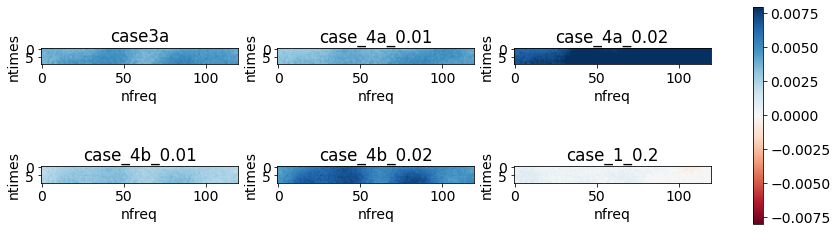

In [313]:
d = 0

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,4))

for ax in axes.flat:
    im = ax.imshow(np.real(g_list_logical_75[d]), cmap='RdBu', vmin=-0.008, vmax=0.008)
    
    ax.set_title(non_red_cases_list[d])
    ax.set_xlabel('nfreq')
    ax.set_ylabel('ntimes')
    d+=1

fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()

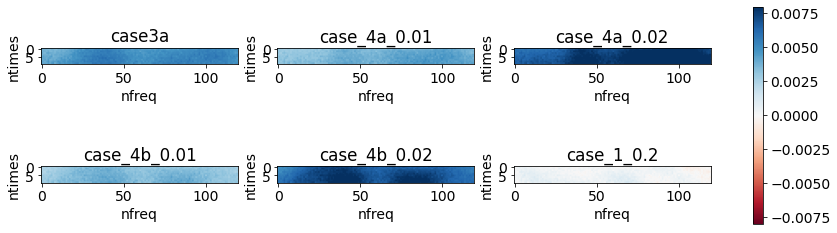

In [314]:
d = 0

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,4))

for ax in axes.flat:
    im = ax.imshow(np.real(g_list_redcal_75[d]), cmap='RdBu', vmin=-0.008, vmax=0.008)
    
    ax.set_title(non_red_cases_list[d])
    ax.set_xlabel('nfreq')
    ax.set_ylabel('ntimes')
    d+=1

fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()

In [22]:
# custom_red_gains_fixed = logical.fix_redcal_degeneracies(filename1, comp_redcal['g_omnical'], true_gains)

# custom_red_gains_fixed = np.load('../new_plots_fixed/case_3a/75/data_case3a_75_120_10_(15)_2__56_4.58.npy',allow_pickle=True)
# custom_red_gains_fixed = np.load('../new_plots_fixed/case_3a/75/data_case3a_75_120_10_(15)_3__50_5.32.npy',allow_pickle=True)

custom_red_gains_fixed = np.load('../new_plots_fixed/case_4a_0.01/124/data_case_4a_0.01_124_120_10_(60)_3__32_-14.86.npy',allow_pickle=True)


custom_red_gains_fixed = custom_red_gains_fixed[()]


X_custom_true_sum  = logical.calulate_X2_sum(true_gains,red_gains_fixed, custom_red_gains_fixed)[1]
X_red_true_sum  = logical.calulate_X2_sum(true_gains,red_gains_fixed, custom_red_gains_fixed )[0]

np.shape(X_custom_true_sum[0])


x_values = X_custom_true_sum
y_values = X_red_true_sum

perc_diff = (np.mean(y_values - x_values)/np.mean(y_values))*100
perc_diff

-14.855049744735663

In [27]:
def calulate_percentage_change(true_gains,red_gains_fixed, custom_red_gains_fixed ):
    """ Takes in the gains from calibration to calculate the chi_sq-like statistic. The statistic takes the
        Sum [(gain.real - gain_true.real)^2 + (gain.imag - gain_true.imag)^2] and summing over all times and 
        frequencies, therefore each antenna will have only one value.
    parameters:
            true_gains: Expected gains (from simulations with no added noise and gains)
            redcal_gains_fixed: gains after running redcal with their degeneracies fixed.
            custom_red_gains_fixed: gains after running logi_cal with their degeneracies fixed.
    Returns:
        redcal_X^2: X^2 values between redcal gains and the expected(true) gains
        logi_cal_X^2: X^2 values between logi_cal gains and the expected(true) gains
    """
    X_custom_true_real , X_custom_true_imag = [], []
    X_red_true_real , X_red_true_imag = [], []


    for i in range(len(custom_red_gains_fixed)):
        a1 = np.real(true_gains[( int('{}'.format(i)) , 'Jee' )] )  ## true gains
        b1 = np.real(custom_red_gains_fixed[( int('{}'.format(i)) , 'Jee' )] )  ## Modified Redcal code
        c1 = np.real(red_gains_fixed[( int('{}'.format(i)) , 'Jee' )] )  ## original Redcal code

        a2 = np.imag(true_gains[( int('{}'.format(i)) , 'Jee' )] )  ## true gains
        b2 = np.imag(custom_red_gains_fixed[( int('{}'.format(i)) , 'Jee' )] )  ## Modified Redcal code
        c2 = np.imag(red_gains_fixed[( int('{}'.format(i)) , 'Jee' )] )  ## original Redcal code


        X1_custom_true_real = np.sum( np.square(a1)* np.square((b1/a1)-1 )  )
        X1_red_true_real = np.sum( np.square(a1)* np.square((c1/a1)-1)   )

        X1_custom_true_imag = np.sum( np.square(a2)* np.square((b2/a2)-1) )
        X1_red_true_imag = np.sum( np.square(a2)* np.square((c2/a2)-1) )

        X_custom_true_real.append((X1_custom_true_real))   ### Chi squared-like statistic between gains from Modified Redcal code and True gains
        X_red_true_real.append((X1_red_true_real))   

        X_custom_true_imag.append((X1_custom_true_imag))   ### Chi squared-like statistic between gains from Modified Redcal code and True gains
        X_red_true_imag.append((X1_red_true_imag))     ### Chi squared-like statistic between gains from original Redcal code and True gains

    X_custom_true_tot = np.array(X_custom_true_real)+np.array(X_custom_true_imag)
    X_red_true_tot = np.array(X_red_true_real) + np.array(X_red_true_imag)

    per_ch = 1 - np.sum(X_custom_true_tot)/np.sum(X_red_true_tot)
    return per_ch*100


In [33]:
aa = calulate_percentage_change(true_gains,red_gains_fixed, custom_red_gains_fixed )

print(aa)

(np.mean(y_values)-np.mean(x_values))/np.mean(y_values)*100

4.583816194320855


4.583816194320864

In [77]:
aa



np.square(1)+np.square(2)+np.square(3)+np.square(4)
np.square(1+2+3+4)

100

In [335]:
aa = np.load('../new_plots_fixed/case_3a/10/data_case3a_10_10_10_(2)_2-0__4_-5.74.jpeg.npy',allow_pickle=True)

aa[()][0,'Jee']

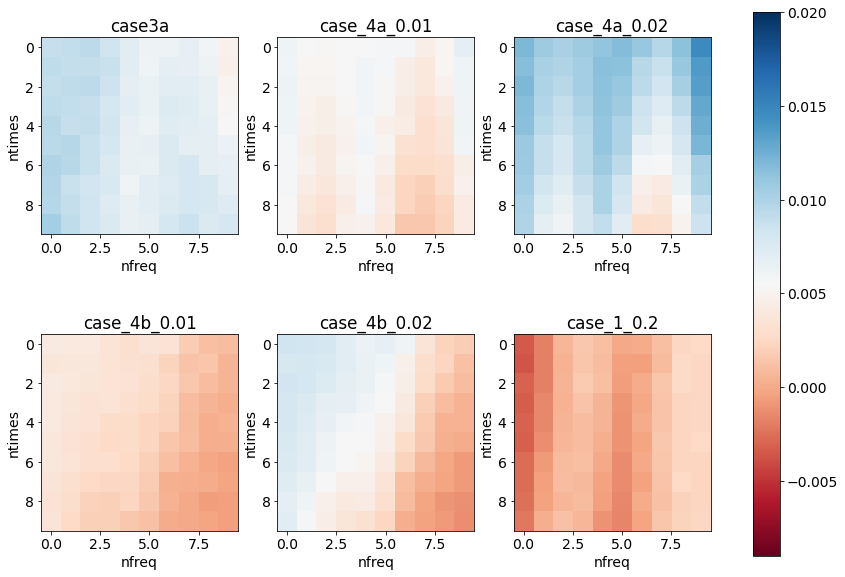

In [311]:
d = 0

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for ax in axes.flat:
    im = ax.imshow(np.real(g_list_logical_10[d]), cmap='RdBu', vmin=-0.009, vmax=0.02)
    
    ax.set_title(non_red_cases_list[d])
    ax.set_xlabel('nfreq')
    ax.set_ylabel('ntimes')
    d+=1

fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()

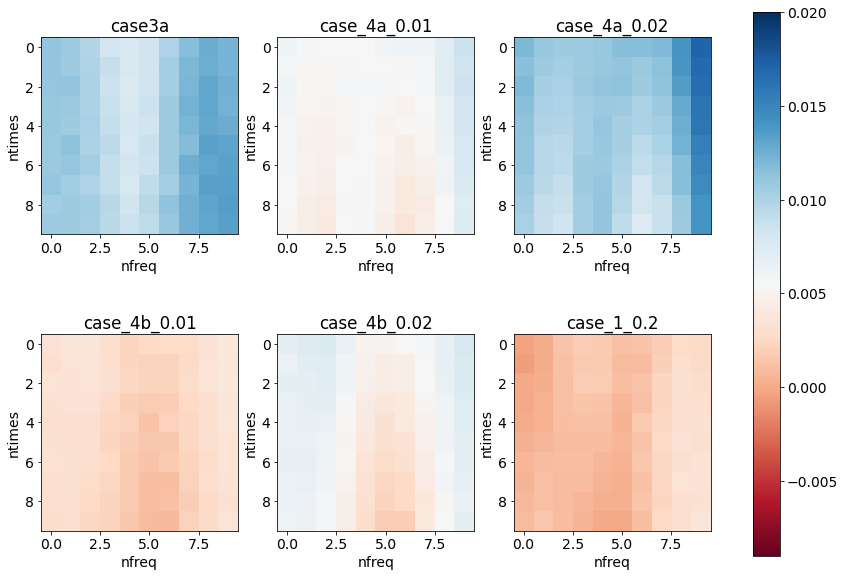

In [312]:
d = 0

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for ax in axes.flat:
    im = ax.imshow(np.real(g_list_redcal_10[d]), cmap='RdBu', vmin=-0.009, vmax=0.02)
    
    ax.set_title(non_red_cases_list[d])
    ax.set_xlabel('nfreq')
    ax.set_ylabel('ntimes')
    d+=1

fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()

In [12]:
custom_red_gains_fixed = np.load('../new_plots_fixed/case_4a_0.01/124/data_case_4a_0.01_124_120_10_(60)_3__32_-14.86.npy',allow_pickle=True)

custom_red_gains_fixed = custom_red_gains_fixed[()]

In [36]:
## 4,11,12,57,41,43,84

print(custom_red_gains_fixed[(41,'Jee')][0][:10])
print('')
print(red_gains_fixed[(41,'Jee')][0][:10])

[0.71286786+0.7132405j  0.71799797+0.7036113j  0.7229988 +0.6935879j
 0.72789174+0.68450016j 0.7319659 +0.67581224j 0.7359442 +0.6676408j
 0.73964286+0.6603875j  0.7418671 +0.65430504j 0.74396914+0.6487213j
 0.74522203+0.6442877j ]

[0.71228236+0.71285135j 0.7173726 +0.7032427j  0.72229934+0.6932284j
 0.7271574 +0.6841729j  0.73119473+0.6754841j  0.73510355+0.6672405j
 0.7387925 +0.66006786j 0.74093634+0.6539693j  0.74301744+0.6484448j
 0.7442405 +0.64401305j]


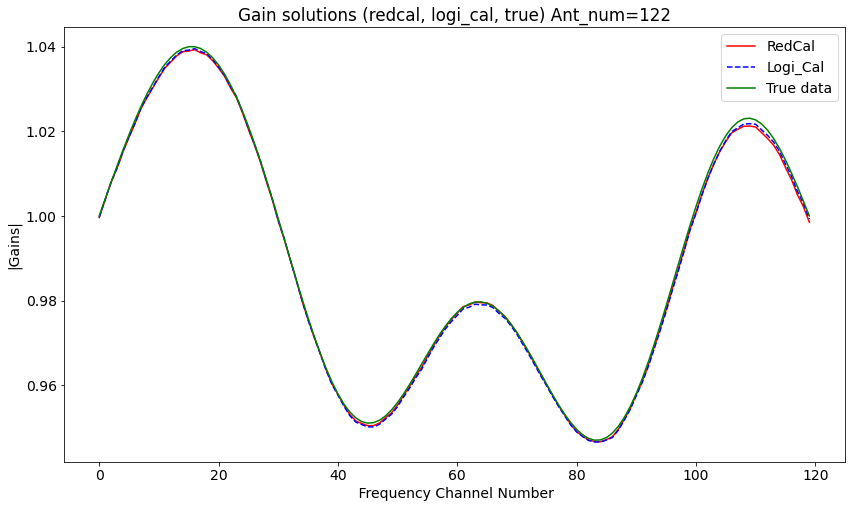

In [45]:
i = 122 ## Antenna Number
j = 0 ## Time sample
plt.figure(figsize=(14,8))
plt.plot(abs(red_gains_fixed[( int('{}'.format(i)) , 'Jee' )][j] ), 'r', label='RedCal')
plt.plot(abs(custom_red_gains_fixed[( int('{}'.format(i)) , 'Jee' )][j] ), 'b--', label='Logi_Cal' )
plt.plot(abs(true_gains[( int('{}'.format(i)) , 'Jee' )][j] ),'g', label = 'True data')
plt.xlabel(' Frequency Channel Number')
plt.ylabel('|Gains|')
plt.title('Gain solutions (redcal, logi_cal, true) Ant_num={}'.format(i))
plt.legend()
plt.show()

# Latex Table

In [80]:
non_red_cases_list

['case3a',
 'case_4a_0.01',
 'case_4a_0.02',
 'case_4b_0.01',
 'case_4b_0.02',
 'case_1_0.2',
 'case_5']

#### Simulation WITH max_bl_cut , Logical_option1

In [221]:
# ls ../new_plots_fixed_option1/case_4a_0.01/124_seed100/**.jpeg > files.txt


In [539]:
ls ../new_plots_fixed_option3/case_5/124/**.jpeg > files.txt


In [544]:
suffix_len = 0

f=open('files.txt','r').readlines()


number_ant ,per_change = [], []
for i in range(len(f)): ## The rabge start at zero for HERA75 and 5 for HERA124 for 1 iterations
# for i in range(10,len(f),2): ## The rabge start at zero for HERA75 and 5 for HERA124 for 2 iterations    

## Option1
#     f1 = f[i][77+suffix_len:]  # case1_0.05
#     f1 = f[i][69+suffix_len:]   # case3a
#     f1 = f[i][80+suffix_len:]   # case4a ,case 4b
#     f1 = f[i][68+suffix_len:]   # case5

## Option2
#     f1 = f[i][86+suffix_len:]  # case1_0.05
#     f1 = f[i][77+suffix_len:]   # case3a
#     f1 = f[i][88+suffix_len:]   # case4a ,case 4b
#     f1 = f[i][76+suffix_len:]   # case5
    
## Option3
#     f1 = f[i][81+suffix_len:]  # case1_0.05
#     f1 = f[i][69+suffix_len:]   # case3a
#     f1 = f[i][84+suffix_len:]   # case4a ,case 4b
    f1 = f[i][72+suffix_len:]   # case5


    f2 = f1[:-6]
    f3 = f2.split("_")
#     print(f3)
    number_ant.append(int(f3[0]))
    per_change.append(float(f3[1]))

number_ant_2d = np.reshape(number_ant, (7, 12))
per_change_2d = np.reshape(per_change, (7, 12))


In [545]:
f[4][72:][:-6]


'70_-0.0'

In [546]:
av_ant = np.round(number_ant_2d.mean(axis=1) , 0)
av_per = np.round(per_change_2d.mean(axis=1),2)

print(per_change_2d.T)
print('')
print(av_per)
print('')
print(number_ant_2d.T)

print(av_ant)

[[ 0.1   0.09  0.01  0.04 -0.08 -0.01 -0.11]
 [-0.05 -0.08 -0.13 -0.07  0.06 -0.01 -0.03]
 [-0.05  0.06  0.12  0.1  -0.06  0.18  0.01]
 [ 0.03 -0.02 -0.05 -0.04  0.13 -0.01  0.24]
 [-0.   -0.   -0.12 -0.05  0.15  0.18  0.15]
 [-0.01  0.02 -0.04  0.08  0.2   0.25 -0.07]
 [ 0.05  0.29  0.13  0.09 -0.03  0.02 -0.09]
 [ 0.02 -0.09  0.16 -0.09  0.02  0.15 -0.17]
 [ 0.13  0.19  0.06  0.01  0.13  0.08  0.  ]
 [-0.04  0.1   0.03  0.2   0.22  0.48 -0.05]
 [-0.14  0.09 -0.1   0.14  0.15  0.18  0.36]
 [-0.01  0.02  0.36 -0.14  0.07  0.05 -0.02]]

[0.   0.06 0.04 0.02 0.08 0.13 0.02]

[[74 72 65 66 61 62 66]
 [64 57 62 64 66 70 62]
 [67 68 69 66 61 72 66]
 [67 70 63 61 70 64 70]
 [70 70 69 58 69 66 75]
 [68 72 74 71 78 73 66]
 [62 68 71 67 62 70 65]
 [68 66 74 59 69 77 62]
 [71 78 70 73 75 65 62]
 [64 71 68 71 75 78 66]
 [63 76 56 69 67 74 77]
 [62 67 81 57 70 69 64]]
[67. 70. 68. 65. 69. 70. 67.]


In [547]:
# data_124_resuts = {"case_4a_0.01": [number_ant_2d,av_ant,per_change_2d,av_per]}


In [548]:
# data_124_resuts['case_5'] = [number_ant_2d,av_ant,per_change_2d,av_per]



In [554]:

# np.load('logical_option3_124.npy',allow_pickle=True)[()]['case_5']


[array([[74, 64, 67, 67, 70, 68, 62, 68, 71, 64, 63, 62],
        [72, 57, 68, 70, 70, 72, 68, 66, 78, 71, 76, 67],
        [65, 62, 69, 63, 69, 74, 71, 74, 70, 68, 56, 81],
        [66, 64, 66, 61, 58, 71, 67, 59, 73, 71, 69, 57],
        [61, 66, 61, 70, 69, 78, 62, 69, 75, 75, 67, 70],
        [62, 70, 72, 64, 66, 73, 70, 77, 65, 78, 74, 69],
        [66, 62, 66, 70, 75, 66, 65, 62, 62, 66, 77, 64]]),
 array([67., 70., 68., 65., 69., 70., 67.]),
 array([[ 0.1 , -0.05, -0.05,  0.03, -0.  , -0.01,  0.05,  0.02,  0.13,
         -0.04, -0.14, -0.01],
        [ 0.09, -0.08,  0.06, -0.02, -0.  ,  0.02,  0.29, -0.09,  0.19,
          0.1 ,  0.09,  0.02],
        [ 0.01, -0.13,  0.12, -0.05, -0.12, -0.04,  0.13,  0.16,  0.06,
          0.03, -0.1 ,  0.36],
        [ 0.04, -0.07,  0.1 , -0.04, -0.05,  0.08,  0.09, -0.09,  0.01,
          0.2 ,  0.14, -0.14],
        [-0.08,  0.06, -0.06,  0.13,  0.15,  0.2 , -0.03,  0.02,  0.13,
          0.22,  0.15,  0.07],
        [-0.01, -0.01,  0.18, -0

#### Simulation WITHOUT max_bl_cut

In [172]:
# ls ../new_plots_fixed_old/case_5/124/**.jpeg > files.txt


In [37]:
suffix_len = 4

f=open('files.txt','r').readlines()


number_ant ,per_change = [], []
for i in range(10,len(f),2): ## The rabge start at zero for HERA75 and 5 for HERA124
    

## For HERA75 the +17 is for the words "_original_logical"
#     f1 = f[i][66+suffix_len:]  # case1_0.05
#     f1 = f[i][61+suffix_len:]   # case3a
#     f1 = f[i][67+suffix_len:]   # case4a ,case 4b
#     f1 = f[i][60+suffix_len:]   # case5
    
## For HERA124 the +17 is for the words "_original_logical"
#     f1 = f[i][68+suffix_len:]  # case1_0.05
#     f1 = f[i][63+suffix_len:]   # case3a
#     f1 = f[i][69+suffix_len:]   # case4a ,case 4b
    f1 = f[i][62+suffix_len:]   # case5


    f2 = f1[:-6]
#     print(f3)
    number_ant.append(int(f2))
#     per_change.append(float(f3[1]))

number_ant_2d = np.reshape(number_ant, (7, 5))
# per_change_2d = np.reshape(per_change, (5, 5))


ValueError: cannot reshape array of size 13 into shape (7,5)

In [174]:
f[34][63+4:][:-6]


'3'

In [175]:
av_ant = np.round(number_ant_2d.mean(axis=1) , 0)

print('')
print(number_ant_2d.T)

print(av_ant)


[[63 65 71 65 70 69 65]
 [68 67 60 60 65 69 68]
 [66 70 63 66 71 69 64]
 [72 79 71 72 75 72 60]
 [64 77 71 71 79 77 71]]
[67. 72. 67. 67. 72. 71. 66.]


#### Simulation WITH max_bl_cut, Logical_option2


In [5]:
# ls ../new_plots_fixed_option2/case_4b_0.02/124/**.jpeg > files.txt


In [6]:
f=open('files.txt','r').readlines()

suffix_len = 0

number_ant ,per_change = [], []
for i in range(0,len(f)): ## The rabge start at zero for HERA75 and 5 for HERA124
    

## For HERA75 the +suffix_len is for the words "_original_logical"
#     f1 = f[i][66+suffix_len:]  # case1_0.05
#     f1 = f[i][61+suffix_len:]   # case3a
#     f1 = f[i][70+suffix_len:]   # case4a ,case 4b
    
    
## For HERA124 the +suffix_len is for the words "_original_logical" k =2
#     f1 = f[i][86+suffix_len:]  # case1_0.05
#     f1 = f[i][77+suffix_len:]   # case3a
#     f1 = f[i][88+suffix_len:]   # case4a ,case 4b

## For HERA124 the +suffix_len is for the words "_original_logical" k =2
#     f1 = f[i][82+suffix_len:]  # case1_0.05
#     f1 = f[i][73+suffix_len:]   # case3a
    f1 = f[i][84+suffix_len:]   # case4a ,case 4b    


    f2 = f1[:-6]
    f3 = f2.split("_")
#     print(f3)
    number_ant.append(int(f3[0]))
    per_change.append(float(f3[1]))

number_ant_2d = np.reshape(number_ant, (7, 3))
per_change_2d = np.reshape(per_change, (7, 3))

In [7]:
f[1][83+0:][:-6]


'_93_5.48'

In [8]:
av_ant = np.round(number_ant_2d.mean(axis=1) , 0)
av_per = np.round(per_change_2d.mean(axis=1),2)

per_change_2d_T = per_change_2d.T
number_ant_2d_T = number_ant_2d.T

print(per_change_2d_T)
print('')
print(av_per)
print('')
print(number_ant_2d_T)

print(av_ant)

[[  5.25   2.07   4.59   1.08  -7.99 -10.29 -10.67]
 [  5.48   1.83   3.3    1.29  -6.68 -10.37 -13.06]
 [  5.86   1.78   4.23   2.54  -7.35 -12.2  -13.1 ]]

[  5.53   1.89   4.04   1.64  -7.34 -10.95 -12.28]

[[96 74 81 68 40 40 41]
 [93 71 73 67 46 38 34]
 [91 77 83 74 45 36 35]]
[93. 74. 79. 70. 44. 38. 37.]


In [138]:
for i in range(len(number_ant_2d_T)):
        row = number_ant_2d_T[i]
        print('                           & {}  &  {}  &  {}  &  {}  &  {}  &  {}  &  {}  &  {}\\\\'.format(i+4,row[0] , row[1], row[2], row[3], row[4], row[5], row[6] ))
        if i==len(number_ant_2d_T)-1:
            print('\hline')
            print('             & Avg &  {}  &  {}  &  {}  &  {}  &  {}  &  {}  &  {}\\\\'.format(int(av_ant[0]) , int(av_ant[1]), int(av_ant[2]), int(av_ant[3]), int(av_ant[4]), int(av_ant[5]), int(av_ant[6]) ))

        

                           & 4  &  96  &  74  &  81  &  68  &  40  &  40  &  41\\
                           & 5  &  93  &  71  &  73  &  67  &  46  &  38  &  34\\
                           & 6  &  91  &  77  &  83  &  74  &  45  &  36  &  35\\
\hline
             & Avg &  93  &  74  &  79  &  70  &  44  &  38  &  37\\


In [139]:
for i in range(len(per_change_2d_T)):
        row = per_change_2d_T[i]
        print('                         & {}  &  {}  &  {}  &  {}  &  {}  &  {}  &  {}  &  {}\\\\'.format( i+4, row[0] , row[1], row[2], row[3], row[4], row[5], row[6] ))
        if i==len(per_change_2d_T)-1:
            print('\hline')
            print('              & Avg &  {}  &  {}  &  {}  &  {}  &  {}  &  {}  &  {}\\\\'.format(av_per[0] , av_per[1], av_per[2], av_per[3], av_per[4], av_per[5], av_per[6] ))

        

                         & 4  &  5.25  &  2.07  &  4.59  &  1.08  &  -7.99  &  -10.29  &  -10.67\\
                         & 5  &  5.48  &  1.83  &  3.3  &  1.29  &  -6.68  &  -10.37  &  -13.06\\
                         & 6  &  5.86  &  1.78  &  4.23  &  2.54  &  -7.35  &  -12.2  &  -13.1\\
\hline
              & Avg &  5.53  &  1.89  &  4.04  &  1.64  &  -7.34  &  -10.95  &  -12.28\\


- Change Logical option3 so I can choose the range of k_values, instead of all of them starting from 2

#### Simulation WITH max_bl_cut, Logical_option3


In [326]:
ls ../new_plots_fixed/case_4a_0.01/124/**.jpeg > files.txt


In [327]:
f=open('files.txt','r').readlines()

suffix_len = 0

number_ant ,per_change = [], []
for i in range(0,len(f)): ## The rabge start at zero for HERA75 and 5 for HERA124
    

## For HERA75 the +suffix_len is for the words "_original_logical"
#     f1 = f[i][66+suffix_len:]  # case1_0.05
#     f1 = f[i][61+suffix_len:]   # case3a
#     f1 = f[i][70+suffix_len:]   # case4a ,case 4b
    
    
## For HERA124 the +suffix_len is for the words "_original_logical"
#     f1 = f[i][72+suffix_len:]  # case1_0.05
#     f1 = f[i][61+suffix_len:]   # case3a
    f1 = f[i][76+suffix_len:]   # case4a ,case 4b


    f2 = f1[:-6]
    f3 = f2.split("_")
#     print(f3)
    number_ant.append(int(f3[0]))
    per_change.append(float(f3[1]))

number_ant_2d = np.reshape(number_ant, (7, 12))
per_change_2d = np.reshape(per_change, (7, 12))

In [328]:
f[34][71+0:][:-6]


'(1)__71_1.69'

In [329]:
av_ant = np.round(number_ant_2d.mean(axis=1) , 0)
av_per = np.round(per_change_2d.mean(axis=1),2)

per_change_2d_T = per_change_2d.T
number_ant_2d_T = number_ant_2d.T

print(per_change_2d_T)
print('')
print(av_per)
print('')
print(number_ant_2d_T)

print(av_ant)

[[  3.19  -2.04  -0.26  -2.47  -8.23  -8.06 -11.81]
 [  4.5   -1.33  -1.85   0.16  -9.75  -9.5  -12.55]
 [  2.91   0.7   -0.06  -3.18 -11.74 -11.32 -16.79]
 [  3.87  -3.18   0.89   1.84  -2.84  -9.65 -16.01]
 [  5.36   0.73  -0.47  -1.32 -10.46 -13.86  -7.82]
 [  4.14   0.17   0.04  -3.12 -10.36  -9.97 -18.29]
 [  5.54  -3.55   0.38   0.49  -9.01 -12.63 -14.77]
 [  6.12   0.39  -2.22   2.08 -11.53  -8.31  -9.21]
 [  4.62  -2.04   1.33  -4.45  -4.83 -10.43 -17.9 ]
 [  6.22   1.34   3.71  -1.07 -13.46  -8.69 -17.56]
 [  8.04   1.44   1.69  -5.2   -9.64  -7.54 -14.66]
 [  6.28   0.79   3.7   -3.07 -10.99  -5.93  -7.93]]

[  5.07  -0.55   0.57  -1.61  -9.4   -9.66 -13.78]

[[ 79  46  54  55  34  41  26]
 [ 81  57  50  58  24  35  32]
 [ 80  56  57  44  19  30  31]
 [ 75  43  68  66  48  37  30]
 [ 82  63  66  56  35  32  46]
 [ 75  56  64  52  31  37  25]
 [ 90  48  67  61  34  38  37]
 [ 91  64  56  68  26  42  43]
 [ 85  46  79  46  39  42  37]
 [ 93  62  77  59  29  42  31]
 [103  67  7

In [330]:
for i in range(len(number_ant_2d_T)):
        row = number_ant_2d_T[i]
        print('&   &  {}  &  {}  &  {}  &  {}  &  {}  &  {}  &  {}\\\\'.format(row[0] , row[1], row[2], row[3], row[4], row[5], row[6] ))
        if i==len(number_ant_2d_T)-1:
            print(' ')
            print('&  {}  &  {}  &  {}  &  {}  &  {}  &  {}  &  {}\\\\'.format(av_ant[0] , av_ant[1], av_ant[2], av_ant[3], av_ant[4], av_ant[5], av_ant[6] ))

        

&   &  79  &  46  &  54  &  55  &  34  &  41  &  26\\
&   &  81  &  57  &  50  &  58  &  24  &  35  &  32\\
&   &  80  &  56  &  57  &  44  &  19  &  30  &  31\\
&   &  75  &  43  &  68  &  66  &  48  &  37  &  30\\
&   &  82  &  63  &  66  &  56  &  35  &  32  &  46\\
&   &  75  &  56  &  64  &  52  &  31  &  37  &  25\\
&   &  90  &  48  &  67  &  61  &  34  &  38  &  37\\
&   &  91  &  64  &  56  &  68  &  26  &  42  &  43\\
&   &  85  &  46  &  79  &  46  &  39  &  42  &  37\\
&   &  93  &  62  &  77  &  59  &  29  &  42  &  31\\
&   &  103  &  67  &  71  &  41  &  28  &  48  &  39\\
&   &  95  &  61  &  79  &  45  &  33  &  50  &  52\\
 
&  86.0  &  56.0  &  66.0  &  54.0  &  32.0  &  40.0  &  36.0\\


In [21]:
RBG = 20
Number_of_clusters = 4
k_v_list = np.arange(2,Number_of_clusters+1)
k_v_list = list(k_v_list)
k_v_list.sort(reverse=True)


array1 = np.linspace(RBG/(Number_of_clusters-1),RBG,Number_of_clusters-1)

RBG_range = [int(x) for x in array1]
RBG_range.append(0)
RBG_range.sort()
print(RBG_range)
k_v_list

[0, 6, 13, 20]


[4, 3, 2]

In [5]:
RBG = 30
k_value_start =3
Number_of_clusters = 6

## Save k-values in a list to be used in the calibration process
k_v_list = np.arange(k_value_start,Number_of_clusters+1)
k_v_list = list(k_v_list)
## reverse the k-values so that ealier RBGs get higher k-values and later RBGs get lower k-values e.g.RBG = [0,10],k=5 and RBG = [10,20],k=4  
k_v_list.sort(reverse=True)  

## Get a list of Redundant baseline groups to be used as ranges based on the overall k-value used.
array1 = np.linspace(RBG/(len(k_v_list)), RBG , len(k_v_list))

RBG_range = [int(x) for x in array1]
RBG_range.append(0)
RBG_range.sort()

clustered_baseline_groups =[]

for rbg in range(len(RBG_range)-1):
    for z in range(RBG_range[rbg],RBG_range[rbg+1]):
        print(k_v_list[rbg],'{},{}'.format(RBG_range[rbg],RBG_range[rbg+1]))
        clustered_baseline_groups.append(logical.get_custom_reds2(c_data,k_v_list[rbg] ,z))

        

6 0,7
6 0,7
6 0,7
6 0,7
6 0,7
6 0,7
6 0,7
5 7,15
5 7,15
5 7,15
5 7,15
5 7,15
5 7,15
5 7,15
5 7,15
4 15,22
4 15,22
4 15,22
4 15,22
4 15,22
4 15,22
4 15,22
3 22,30
3 22,30
3 22,30
3 22,30
3 22,30
3 22,30
3 22,30
3 22,30


In [183]:
k_values = []
data_file = c_data
for rbg in range(30):
    red_base = data_file.get_redundancies(tol=1.0, use_antpos=False, include_conjugates=False,include_autos=True,
                                   conjugate_bls=False)

    n = red_base[0][rbg]  
    n = np.array(n)     ## Saving a list of redundant baselines in an array.

    ##  Combining a list (of visibilities) of 2D arrays into a 3D array
    array_3D = []
    for i in range(len(n)):
        array_3D.append(data_file.get_data(n[i]) )

    array_3D = np.array(array_3D)

    ## Appending multiple time sample into one array_per_baseline.
    ## e.g. for a nfreq = 120,ntimes=1 we have 1 X 120=120 elements per_baseline
    ###     for a nfreq = 120,ntimes=60 we have 60 X 120=7200 elements per_baseline
    new_time = []
    for i in range(len(n)):
        abc = abs(array_3D[i])
        d1 = []
        for j in range(len(abc)):
            d1.append(abc[j])
            d2 = np.concatenate(d1)  ### appending all time samples for each baseline
        new_time.append(d2)

    new_time = np.array(new_time)


    X = new_time
    y = n

    sil = []
    kmax = 6

    # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(X)
        labels = kmeans.labels_
        sil.append(silhouette_score(X, labels, metric = 'euclidean'))

    max_index = sil.index(max(sil)) +2
    k_values.append(max_index)

In [185]:
print(k_values)

[3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2]


In [178]:
from sklearn.metrics import silhouette_score



sil = []
kmax = 6

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

# sil = np.array(sil)

In [180]:
sil

[0.4987457158087829,
 0.39691878937451386,
 0.2815830225568388,
 0.20084368067318958,
 0.15089879289773514]

In [179]:
max_index = sil.index(max(sil)) +2
max_index

2

## Bar Charts

In [ ]:
https://www.google.com/search?q=bar+graph+with+negative+numbers&client=firefox-b-d&tbm=isch&source=iu&ictx=1&fir=PDlRuEhn22P_hM%252CfDdS7A_aRshmyM%252C_&vet=1&usg=AI4_-kSfUY1X5hcfYramYmmhVMiBnJ7H6w&sa=X&ved=2ahUKEwi9n6ub843yAhWJR0EAHabbAjcQ9QF6BAgUEAE&biw=1280&bih=595#imgrc=PDlRuEhn22P_hM&imgdii=WAxE01ySlE_VAM

In [ ]:
https://stackoverflow.com/questions/35979852/stacked-bar-charts-using-python-matplotlib-for-positive-and-negative-values

In [ ]:
https://www.zkoss.org/zkchartsdemo/bar_negative_stack

In [20]:
av_ant = np.round(number_ant_2d.mean(axis=1) , 0)
av_per = np.round(per_change_2d.mean(axis=1),2)

print(per_change_2d.T)
print('')
print(av_per)
print('')
print(number_ant_2d.T)

print(av_ant)
np.round(per_change_2d.sum(axis=1),2)

[[  3.7   -1.84  -0.31  -3.18  -8.7   -9.93 -11.47]
 [  3.58  -1.8   -0.57  -3.65 -10.77 -11.84 -13.22]
 [  5.61   1.22   3.93   0.07  -8.48  -7.95 -11.61]
 [  6.47   1.1    3.57  -0.03  -8.9  -10.59 -14.09]
 [  6.61   2.06   5.69   0.81  -9.17  -9.64 -11.59]]

[  5.19   0.15   2.46  -1.2   -9.2   -9.99 -12.4 ]

[[88 51 55 41 25 37 35]
 [79 48 52 45 26 38 33]
 [90 63 74 60 32 44 40]
 [89 69 79 58 37 37 34]
 [97 73 84 65 35 42 39]]
[89. 61. 69. 54. 31. 40. 36.]


array([ 25.97,   0.74,  12.31,  -5.98, -46.02, -49.95, -61.98])

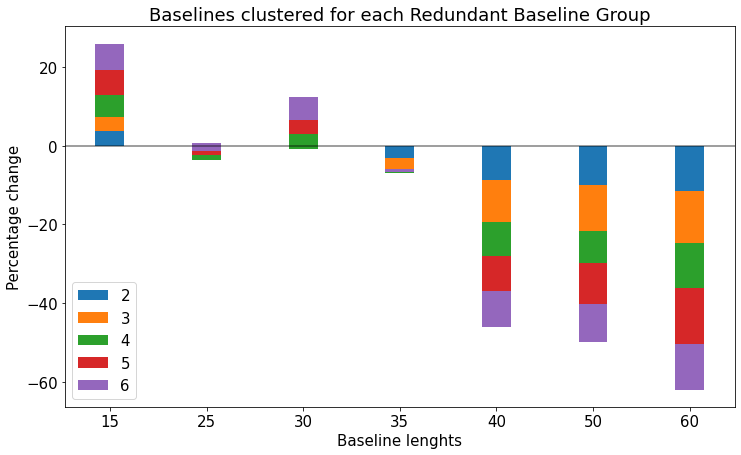

[  3.7   -1.84  -0.31  -3.18  -8.7   -9.93 -11.47] [  3.58  -1.8   -0.57  -3.65 -10.77 -11.84 -13.22] [  5.61   1.22   3.93   0.07  -8.48  -7.95 -11.61] [  6.47   1.1    3.57  -0.03  -8.9  -10.59 -14.09] [  6.61   2.06   5.69   0.81  -9.17  -9.64 -11.59]


In [22]:
len_groups = per_change_2d

# labels = bl_len_key[:N_red_clusters]
legend_label = ['2','3','4','5','6']
labels = ['15', '25', '30', '35', '40','50','60']

cl1 = len_groups[:,0]
cl2 = len_groups[:,1]
cl3 = len_groups[:,2]
cl4 = len_groups[:,3]
cl5 = len_groups[:,4]

# cl6 = len_groups[:,5]
# cl7 = len_groups[:,6]

width = 0.3       # the width of the bars: can also be len(x) sequence

b_cl3 = np.add(cl1,cl2) ## create bottom plot for cluster 3
b_cl4 = np.add(b_cl3, cl3)
b_cl5 = np.add(b_cl4, cl4)
# b_cl6 = np.add(b_cl5, cl5)
# b_cl7 = np.add(b_cl6, cl6)

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(12,7))

plt.bar(labels, cl1,width,label=legend_label[0] )
plt.bar(labels, cl2,width, bottom =cl1 , label= legend_label[1] )
plt.bar(labels, cl3,width, bottom =b_cl3,label= legend_label[2] )
plt.bar(labels, cl4,width, bottom =b_cl4,label= legend_label[3] )
plt.bar(labels, cl5,width, bottom =b_cl5,label= legend_label[4] )
# plt.bar(labels, cl6,width, bottom =b_cl6,label= legend_label[4] )
# plt.bar(labels, cl6,width, bottom =b_cl6,label= legend_label[4] )

# for i in splits[1:8]:
#     plt.vlines(i-0.5,0,68, color='grey',linestyles='--', linewidth=3)
plt.ylabel('Percentage change')
plt.title('Baselines clustered for each Redundant Baseline Group')
plt.xlabel("Baseline lenghts")
plt.axhline(color='k', alpha=0.5)
# plt.xticks(labels, rotation=75)
plt.legend()
# plt.savefig('../non-redundant-pipeline/test_simulations/plots/'+ non_red_case +'_'+calib_param + '_({})_(5-0).jpeg'.format(N_red_clusters), bbox_inches='tight')
plt.show()


# ax.bar(labels, men_means, width,  label='Men')
# ax.bar(labels, women_means, width, bottom=men_means,
#        label='Women')
# ax.bar(labels, women_means, width, middle=men_means,
#        label='Women')
print(cl1,cl2,cl3,cl4,cl5)

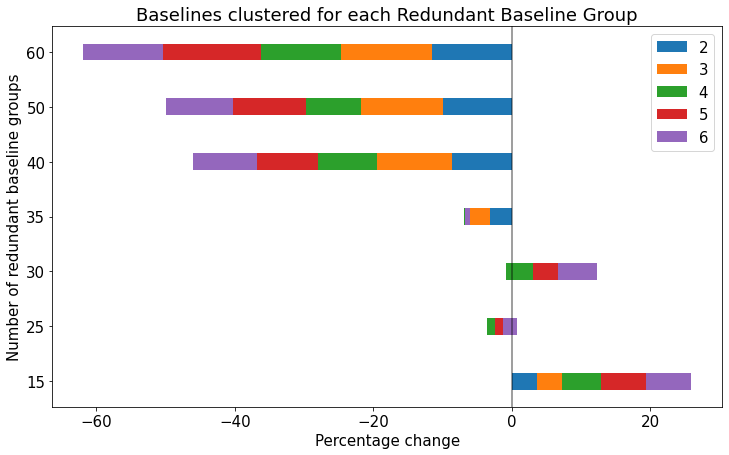

[  3.7   -1.84  -0.31  -3.18  -8.7   -9.93 -11.47] [  3.58  -1.8   -0.57  -3.65 -10.77 -11.84 -13.22] [  5.61   1.22   3.93   0.07  -8.48  -7.95 -11.61] [  6.47   1.1    3.57  -0.03  -8.9  -10.59 -14.09] [  6.61   2.06   5.69   0.81  -9.17  -9.64 -11.59]


In [23]:
len_groups = per_change_2d

# labels = bl_len_key[:N_red_clusters]
legend_label = ['2','3','4','5','6']
labels = ['15', '25', '30', '35', '40','50','60']

cl1 = len_groups[:,0]
cl2 = len_groups[:,1]
cl3 = len_groups[:,2]
cl4 = len_groups[:,3]
cl5 = len_groups[:,4]

# cl6 = len_groups[:,5]
# cl7 = len_groups[:,6]

width = 0.3       # the width of the bars: can also be len(x) sequence

b_cl3 = np.add(cl1,cl2) ## create bottom plot for cluster 3
b_cl4 = np.add(b_cl3, cl3)
b_cl5 = np.add(b_cl4, cl4)
# b_cl6 = np.add(b_cl5, cl5)
# b_cl7 = np.add(b_cl6, cl6)

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(12,7))

plt.barh(labels, cl1,width,label=legend_label[0] )
plt.barh(labels, cl2,width, left =cl1 , label= legend_label[1] )
plt.barh(labels, cl3,width, left =b_cl3,label= legend_label[2] )
plt.barh(labels, cl4,width, left =b_cl4,label= legend_label[3] )
plt.barh(labels, cl5,width, left =b_cl5,label= legend_label[4] )
# plt.bar(labels, cl6,width, bottom =b_cl6,label= legend_label[4] )
# plt.bar(labels, cl6,width, bottom =b_cl6,label= legend_label[4] )

# for i in splits[1:8]:
#     plt.vlines(i-0.5,0,68, color='grey',linestyles='--', linewidth=3)
plt.xlabel('Percentage change')
plt.title('Baselines clustered for each Redundant Baseline Group')
plt.ylabel("Number of redundant baseline groups")
plt.axvline(color='k', alpha=0.5)
# plt.xticks(labels, rotation=75)
plt.legend()
# plt.savefig('../non-redundant-pipeline/test_simulations/plots/'+ non_red_case +'_'+calib_param + '_({})_(5-0).jpeg'.format(N_red_clusters), bbox_inches='tight')
plt.show()


# ax.bar(labels, men_means, width,  label='Men')
# ax.bar(labels, women_means, width, bottom=men_means,
#        label='Women')
# ax.bar(labels, women_means, width, middle=men_means,
#        label='Women')
print(cl1,cl2,cl3,cl4,cl5)

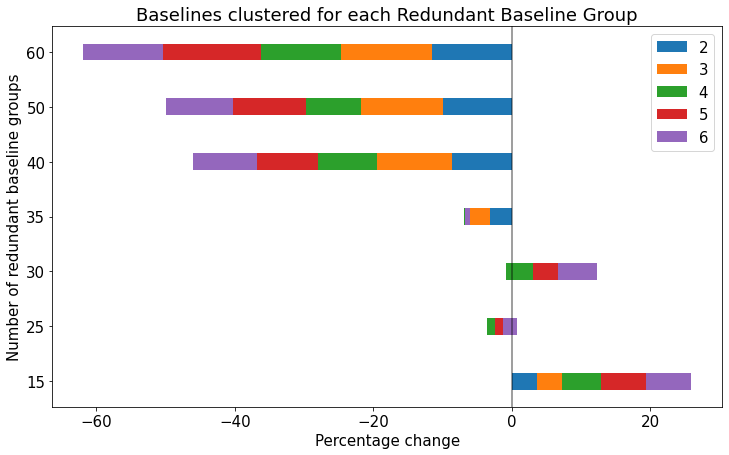

[  3.7   -1.84  -0.31  -3.18  -8.7   -9.93 -11.47] [  3.58  -1.8   -0.57  -3.65 -10.77 -11.84 -13.22] [  5.61   1.22   3.93   0.07  -8.48  -7.95 -11.61] [  6.47   1.1    3.57  -0.03  -8.9  -10.59 -14.09] [  6.61   2.06   5.69   0.81  -9.17  -9.64 -11.59]


In [60]:
len_groups = per_change_2d

# labels = bl_len_key[:N_red_clusters]
legend_label = ['2','3','4','5','6']
labels = ['15', '25', '30', '35', '40','50','60']

cl1 = len_groups[:,0]
cl2 = len_groups[:,1]
cl3 = len_groups[:,2]
cl4 = len_groups[:,3]
cl5 = len_groups[:,4]

# cl6 = len_groups[:,5]
# cl7 = len_groups[:,6]

width = 0.3       # the width of the bars: can also be len(x) sequence

b_cl3 = np.add(cl1,cl2) ## create bottom plot for cluster 3
b_cl4 = np.add(b_cl3, cl3)
b_cl5 = np.add(b_cl4, cl4)
# b_cl6 = np.add(b_cl5, cl5)
# b_cl7 = np.add(b_cl6, cl6)

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(12,7))

plt.barh(labels, cl1,width,label=legend_label[0] )
plt.barh(labels, cl2,width, left =cl1 , label= legend_label[1] )
plt.barh(labels, cl3,width, left =b_cl3,label= legend_label[2] )
plt.barh(labels, cl4,width, left =b_cl4,label= legend_label[3] )
plt.barh(labels, cl5,width, left =b_cl5,label= legend_label[4] )
# plt.bar(labels, cl6,width, bottom =b_cl6,label= legend_label[4] )
# plt.bar(labels, cl6,width, bottom =b_cl6,label= legend_label[4] )

# for i in splits[1:8]:
#     plt.vlines(i-0.5,0,68, color='grey',linestyles='--', linewidth=3)
plt.xlabel('Percentage change')
plt.title('Baselines clustered for each Redundant Baseline Group')
plt.ylabel("Number of redundant baseline groups")
plt.axvline(color='k', alpha=0.5)
# plt.xticks(labels, rotation=75)
plt.legend()
# plt.savefig('../non-redundant-pipeline/test_simulations/plots/'+ non_red_case +'_'+calib_param + '_({})_(5-0).jpeg'.format(N_red_clusters), bbox_inches='tight')
plt.show()


# ax.bar(labels, men_means, width,  label='Men')
# ax.bar(labels, women_means, width, bottom=men_means,
#        label='Women')
# ax.bar(labels, women_means, width, middle=men_means,
#        label='Women')
print(cl1,cl2,cl3,cl4,cl5)

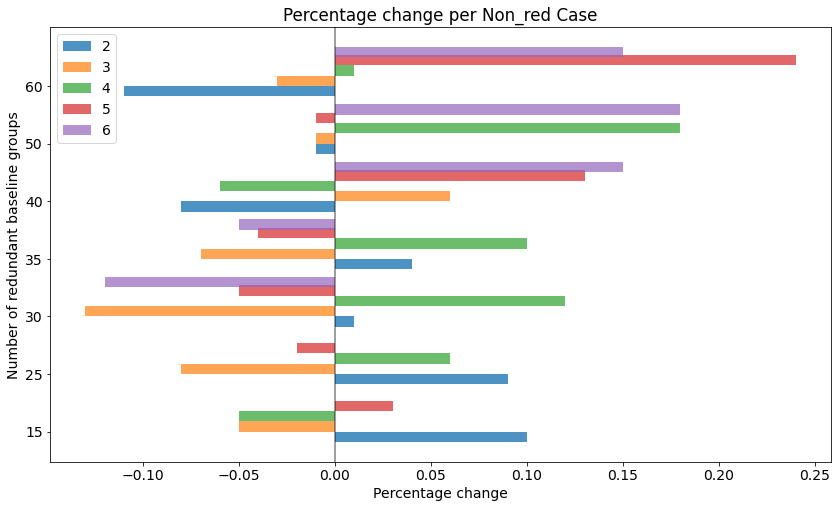

In [625]:
len_groups = per_change_2d

# Numbers of pairs of bars you want
N = 7

# Data on X-axis

legend_label = ['2','3','4','5','6']
labels = ['15', '25', '30', '35', '40','50','60']

cl1 = len_groups[:,0]
cl2 = len_groups[:,1]
cl3 = len_groups[:,2]
cl4 = len_groups[:,3]
cl5 = len_groups[:,4]

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(14,8))

# Width of a bar 
width = 0.18

# Plotting
plt.barh(ind, cl1 , width, label= legend_label[0], alpha = 0.8 )
plt.barh(ind + width, cl2, width, label=  legend_label[1], alpha = 0.7 )
plt.barh(ind + 2*width, cl3, width, label= legend_label[2], alpha = 0.7 )
plt.barh(ind + 3*width, cl4, width, label= legend_label[3], alpha = 0.7 )
plt.barh(ind + 3.8*width, cl5, width, label= legend_label[4], alpha = 0.7 )

plt.xlabel('Percentage change')
plt.title('Percentage change per Non_red Case')
plt.ylabel("Number of redundant baseline groups")
plt.axvline(color='k', alpha=0.5)
    
x_ticks = ['15', '25', '30', '35', '40','50','60']


# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.yticks(ind + width / 2, x_ticks)


# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [630]:
data_124_option1= np.load('logical_option1_124.npy',allow_pickle=True)[()]

non_red_cases_list = ["case_3a", "case_4a_0.01","case_4a_0.02", "case_4b_0.01","case_4b_0.02", "case_1_0.05", "case_5"]


In [651]:
def bar_plot_124(data_array, plot_tittle):

    cal_vulues = data_array.T

    # Numbers of pairs of bars you want
    N = len(data_array)

    # Data on X-axis

    legend_label = ['2','3','4','5','6']
    labels = ['15', '25', '30', '35', '40','50','60']

    # Position of bars on x-axis
    ind = np.arange(N)
    
    # Width of a bar 
    width = 0.18

    # Plotting
    # Figure size
    plt.figure(figsize=(14,8))

    for i in range(len(cal_vulues)):
        value = cal_vulues[i]
        plt.barh(ind + (i+0.9)*width, value , width, label= legend_label[i], alpha = 0.8 )

    plt.xlabel('Percentage change')
    plt.title('Percentage change per Non_red Case ({})'.format(plot_tittle))
    plt.ylabel("Number of redundant baseline groups")
    plt.axvline(color='k', alpha=0.5)
    plt.hlines([1.03,2.03,3.03,4.03,5.03,6.03],cal_vulues.min() , cal_vulues.max(), color='grey',linestyles='--', linewidth=1)

    x_ticks = labels
    plt.yticks(ind + width+0.25, x_ticks)

    # Finding the best position for legends and putting it
    plt.legend(loc='best',title="K_values")
    plt.show()


In [652]:
def bar_plot_124_annotate(data_array, plot_tittle):

    cal_vulues = data_array.T

    # Numbers of pairs of bars you want
    N = len(data_array)

    # Data on X-axis

    legend_label = ['2','3','4','5','6']
    labels = ['15', '25', '30', '35', '40','50','60']

    # Position of bars on x-axis
    ind = np.arange(N)
    
    # Width of a bar 
    width = 0.18

    # Plotting
    # Figure size
    plt.figure(figsize=(14,8))

    rects_list = []
    for i in range(len(cal_vulues)):
        value = cal_vulues[i]
        ax = plt.barh(ind + (i+0.9)*width, value , width, label= legend_label[i], alpha = 0.8 )
        rects_list.append(ax.patches)
    plt.xlabel('Percentage change')
    plt.title('Percentage change per Non_red Case ({})'.format(plot_tittle))
    plt.ylabel("Number of redundant baseline groups")
    plt.axvline(color='k', alpha=0.5)
    plt.hlines([1.03,2.03,3.03,4.03,5.03,6.03],cal_vulues.min() , cal_vulues.max(), color='grey',linestyles='--', linewidth=1)

    x_ticks = labels
    plt.yticks(ind + width+0.25, x_ticks)

    # Finding the best position for legends and putting it
    plt.legend(loc='best',title="K_values")

    # For each bar: Place a label
    for k in range(len(rects_list)):
        for rect in rects_list[k]:
            # Get X and Y placement of label from rect.
            x_value = rect.get_width()
            y_value = rect.get_y() + rect.get_height() / 2

            # Number of points between bar and label. Change to your liking.
            space = 5
            # Vertical alignment for positive values
            ha = 'left'

            # If value of bar is negative: Place label left of bar
            if x_value < 0:
                # Invert space to place label to the left
                space *= -1
                # Horizontally align label at right
                ha = 'right'

            # Use X value as label and format number with one decimal place
            label = "{:.1f}%".format(x_value)

            # Create annotation
            plt.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(space, 0),          # Horizontally shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                va='center',                # Vertically center label
                ha=ha)                      # Horizontally align label differently for
                                            # positive and negative values.
    plt.show()


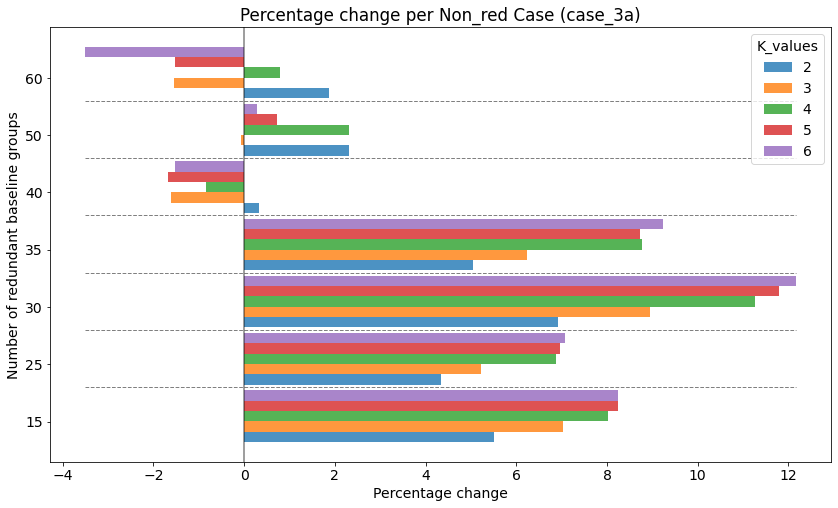

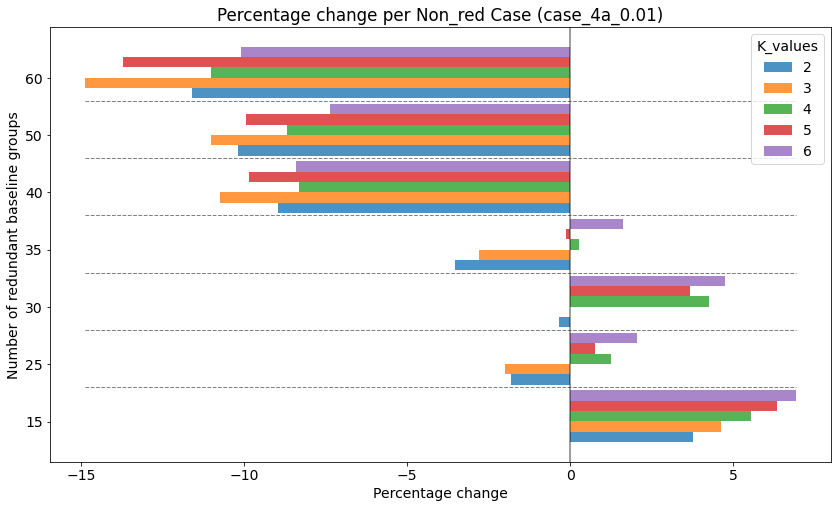

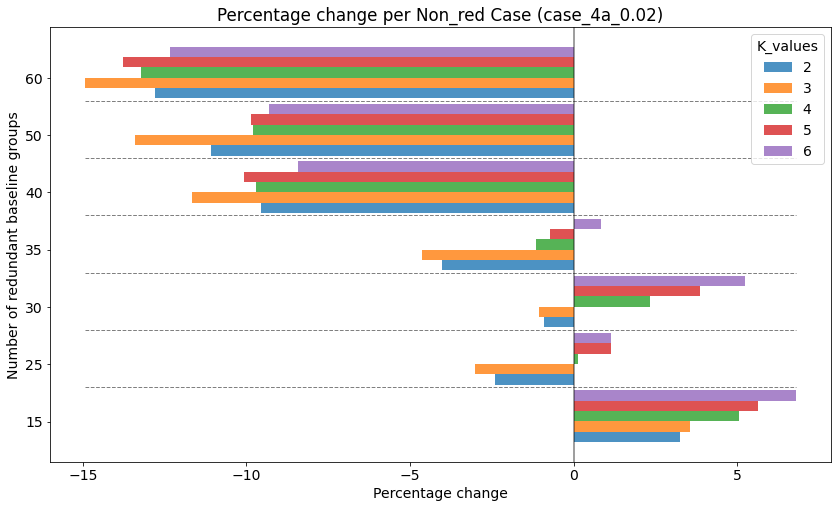

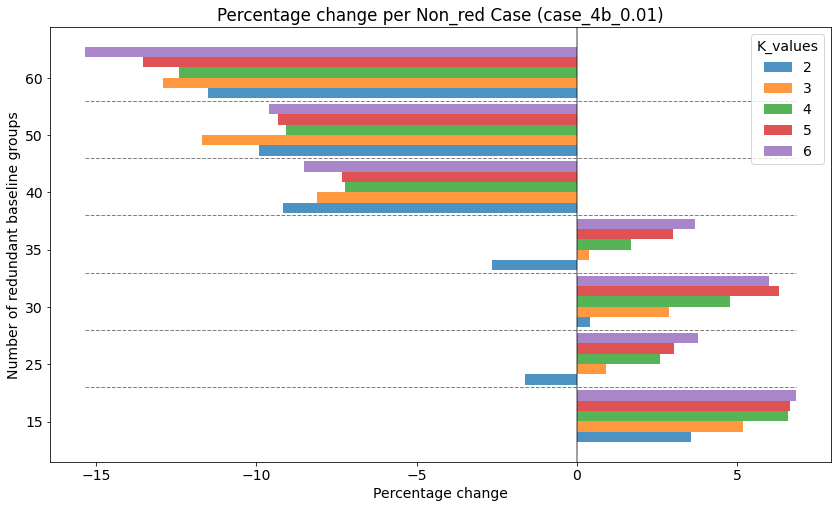

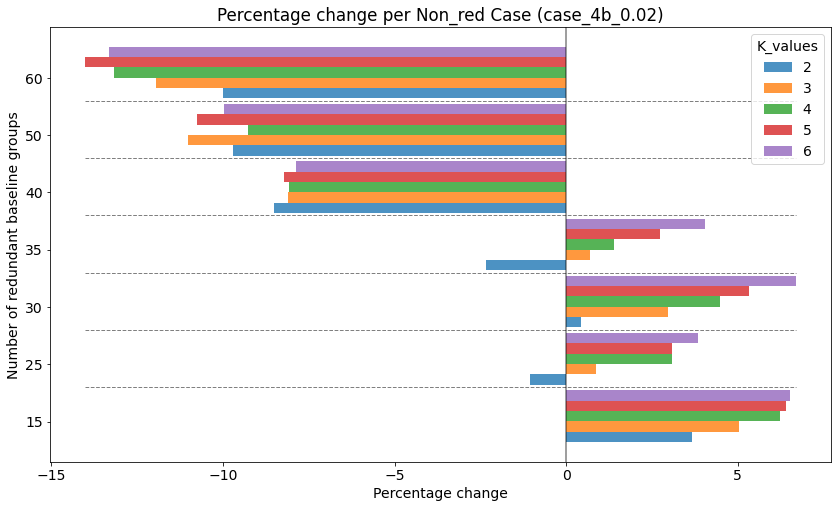

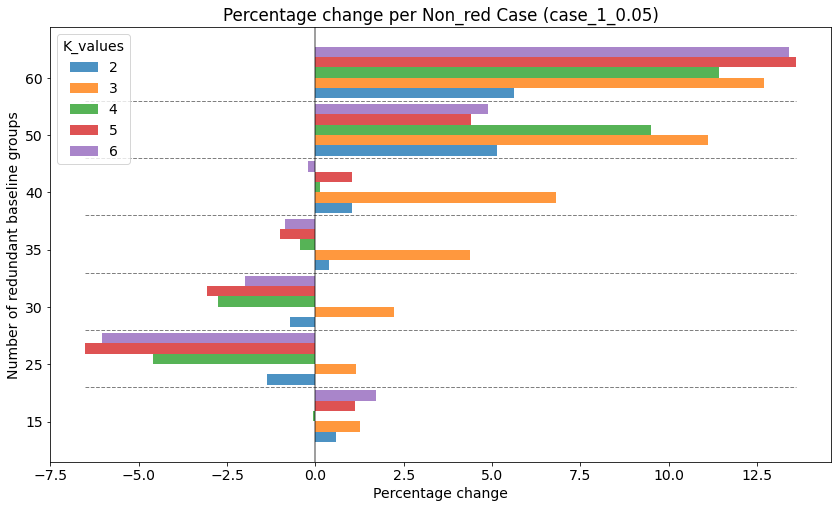

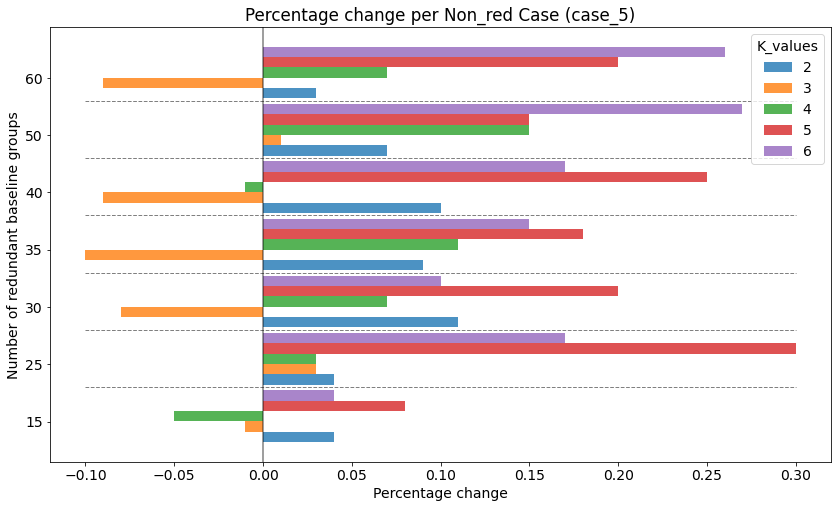

In [653]:
for case in non_red_cases_list:
    data = data_124_option1[case][2]
    bar_plot_124(data, case)

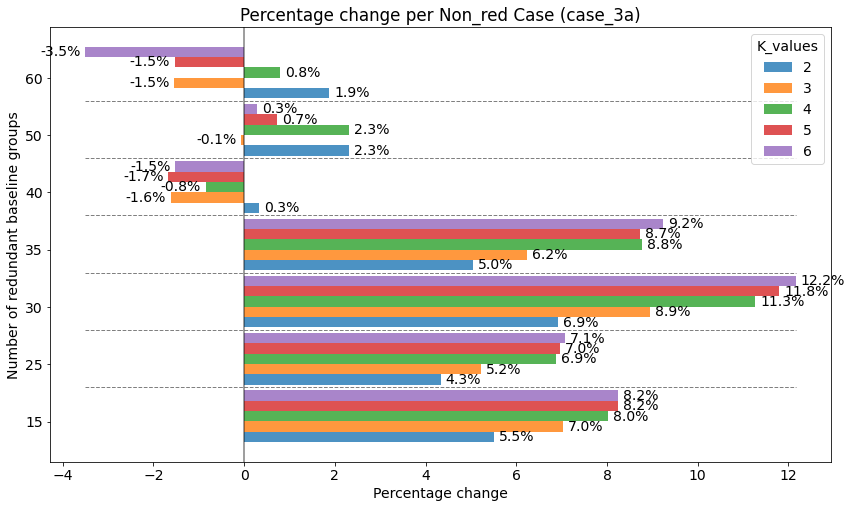

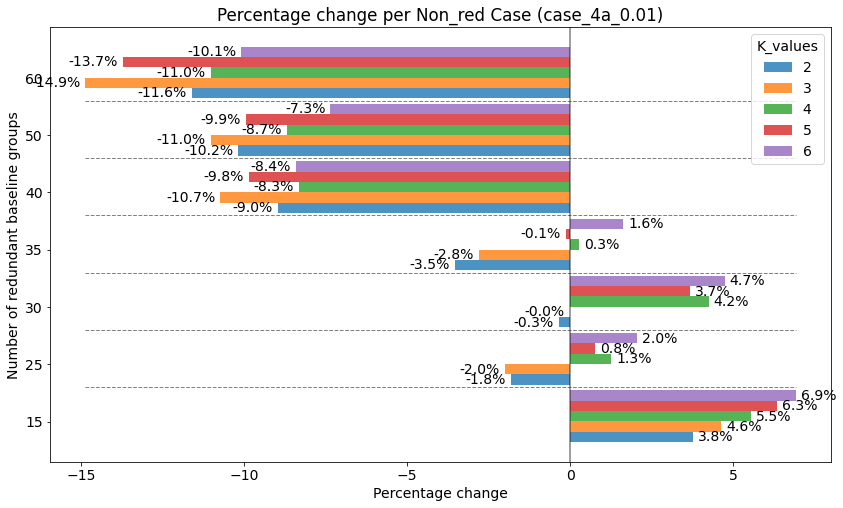

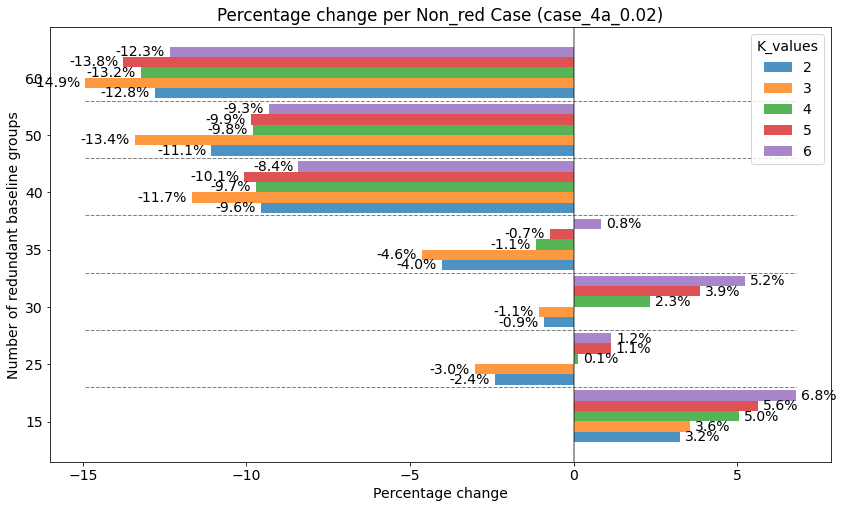

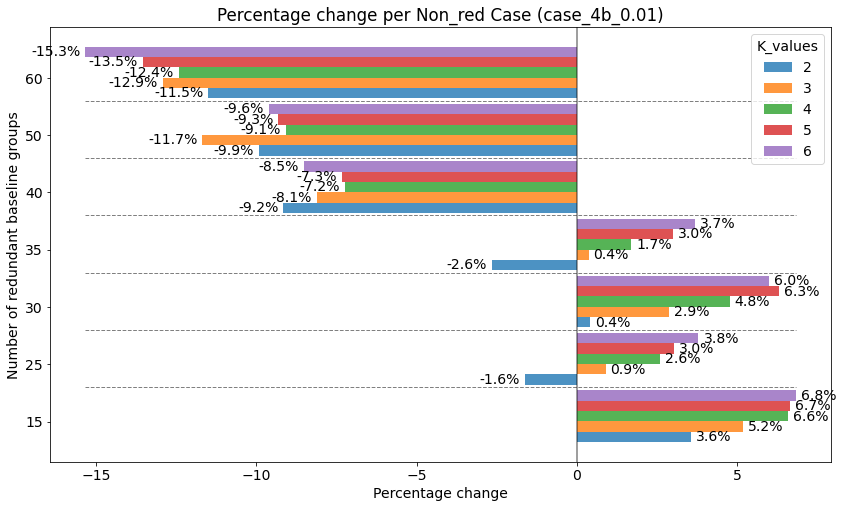

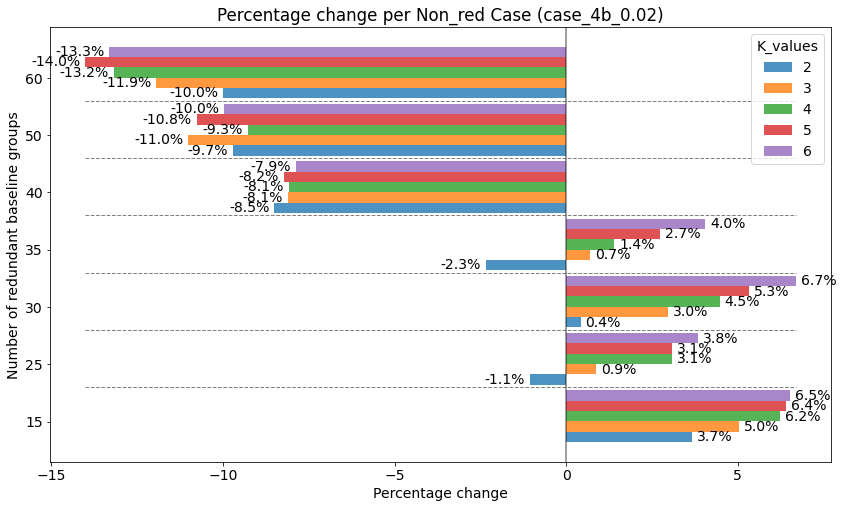

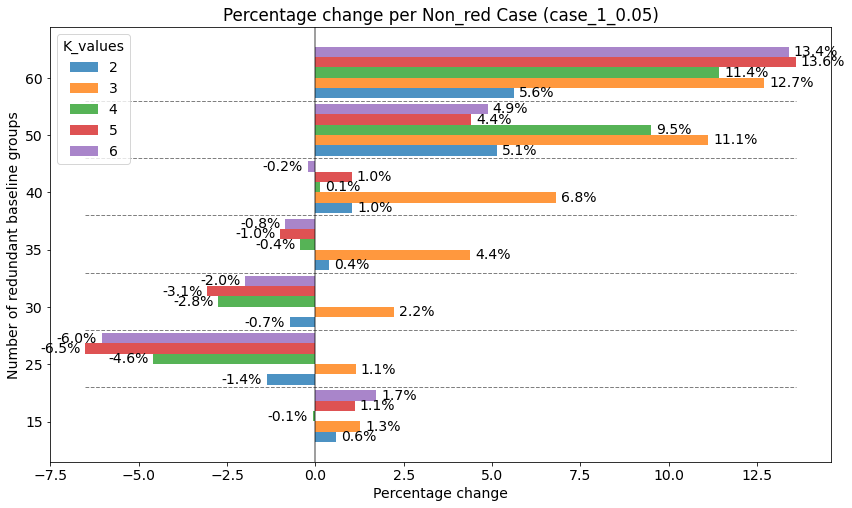

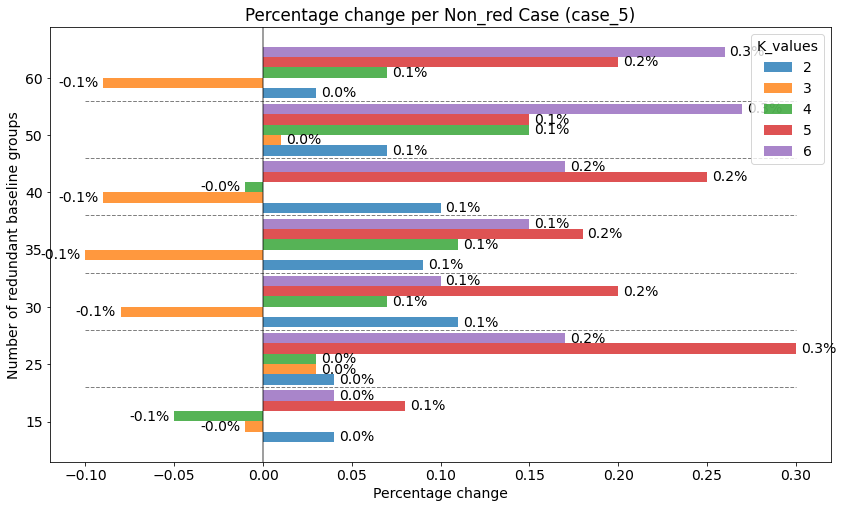

In [654]:
for case in non_red_cases_list:
    data = data_124_option1[case][2]
    bar_plot_124_annotate(data, case)

## AIC vs. BIC


- Bayesian  information  criterion  (BIC) and Akaike information criterion (AIC) are often used as fits to choose between models. 
- I know that they try to balance good fit with parsimony, but beyond that I’m not sure what exactly they mean. What are they really doing? Which is better? What does it mean if they disagree? 

    - AIC and BIC are both penalized-likelihood criteria. They are sometimes used for choosing best predictor subsets in regression and often used for comparing non-nested models, which ordinary statistical tests cannot do.
    
- The AIC tries to select the model that most adequately describes an unknown, high dimensional reality